## 什么是因子
因子是把数据进行分类并标记为不同层级(`level`，有时候也翻译成因子水平， 我个人觉得翻译为层级，更接近它的特性，因此，我都会用层级来描述)的数据对象，他们可以存储字符串和整数。因子类型有三个属性：

- 存储类别的数据类型
- 离散变量
- 因子的层级是有限的，只能取因子层级中的值或缺失(`NA`)

## 创建因子
- 因子层级会自动按照字符串的字母顺序排序，比如`high low medium`。也可以用`levels=c()`指定顺序
- 不属于因子层级中的值, 会被当作缺省值`NA`

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(palmerpenguins)

In [3]:
income <- c("low", "high", "medium", "medium", "low", "high",  "high")
factor(income)

[1] low    high   medium medium low    high   high  
Levels: high low medium

In [4]:
## 指定顺序
factor(income, levels=c("low", "high", "medium"))

[1] low    high   medium medium low    high   high  
Levels: low high medium

In [5]:
factor(income, levels=c("low", "high"))

[1] low  high <NA> <NA> low  high high
Levels: low high

相比较字符串而言，因子类型更容易处理，因此很多函数会自动的将字符串转换为因子来处理，但事实上，这也会造成，不想当做因子的却又当做了因子的情形

最典型的是在`R 4.0`之前，`data.frame()`中`stringsAsFactors`选项，**默认将字符串类型转换为因子类型**，但这个默认也带来一些不方便，因此在R 4.0之后取消了这个默认。

在`tidyverse`集合里，有专门处理因子的宏包`forcats`

In [6]:
library(forcats)

## 调整因子顺序
- 因子层级默认是按照字母顺序排序
- `fct_relevel()`指定因子顺序 
  - `after=Inf`将某个因子移到最后面
- `fct_inorder()` 按照字符串第一次出现的次序
- `fct_reorder()` 按照其他变量的升序排序 `.fun=`指定函数
- `fct_rev()` 按照因子层级的逆序排序
- `fct_infreq()`按照因子频率排序，从大到小
  - `fct_rev(fct_infreq())`按照因子频率排序，从小到大

In [7]:
income <- c("low", "high", "medium", "medium", "low", "high",  "high")
x <- factor(income)
x
# 指定顺序
x %>% fct_relevel(c("high", "medium", "low"))
x %>% fct_relevel("medium")
x %>% fct_relevel("medium", after=Inf)

# 按照字符串第一次出现的次序
x %>% fct_inorder()

[1] low    high   medium medium low    high   high  
Levels: high low medium

[1] low    high   medium medium low    high   high  
Levels: high medium low

[1] low    high   medium medium low    high   high  
Levels: medium high low

[1] low    high   medium medium low    high   high  
Levels: high low medium

[1] low    high   medium medium low    high   high  
Levels: low high medium

In [8]:
# 按照其他变量的中位数的升序排序
x %>% fct_reorder(c(1:7), .fun=median)

[1] low    high   medium medium low    high   high  
Levels: low medium high

## 应用
调整因子层级有什么用呢？

这个功能在ggplot可视化中调整分类变量的顺序非常方便

In [9]:
d <- tibble(
  x = c("a","a", "b", "b", "c", "c"),
  y = c(2, 2, 1, 5,  0, 3)
  
)
d

x,y
<chr>,<dbl>
a,2
a,2
b,1
b,5
c,0
c,3


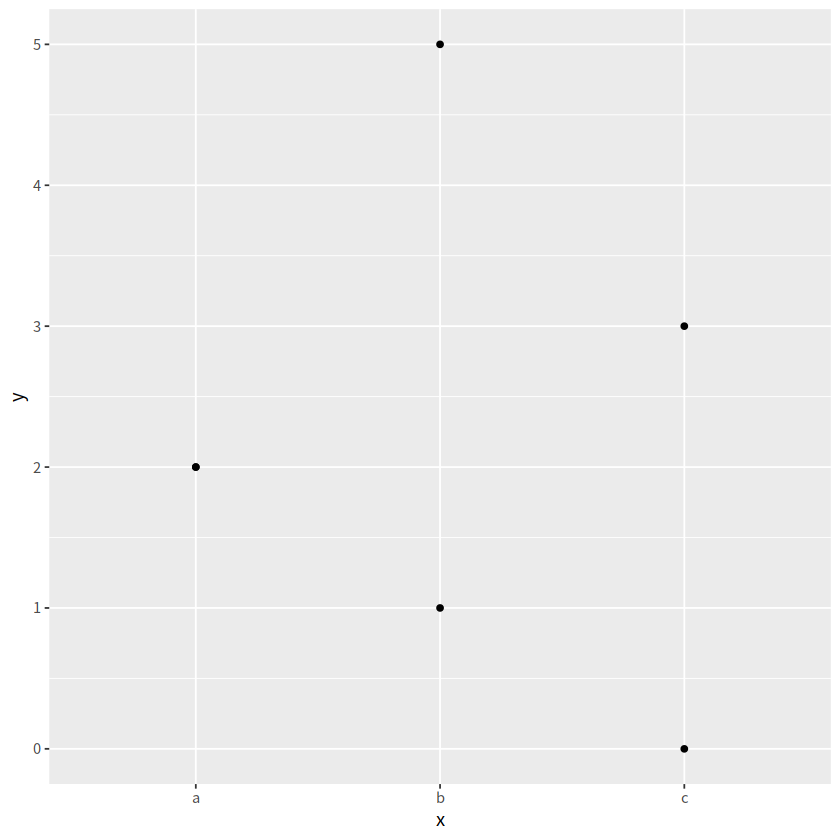

In [10]:
d %>% 
  ggplot(aes(x = x, y = y))+
  geom_point()

### ` fct_reorder()`
- `fct_reorder(x, y, .fun=median)`可以让`x`的顺序按照`x`中每个分类变量对应`y`值的中位数升序排序
- `.desc = TRUE`颠倒顺序

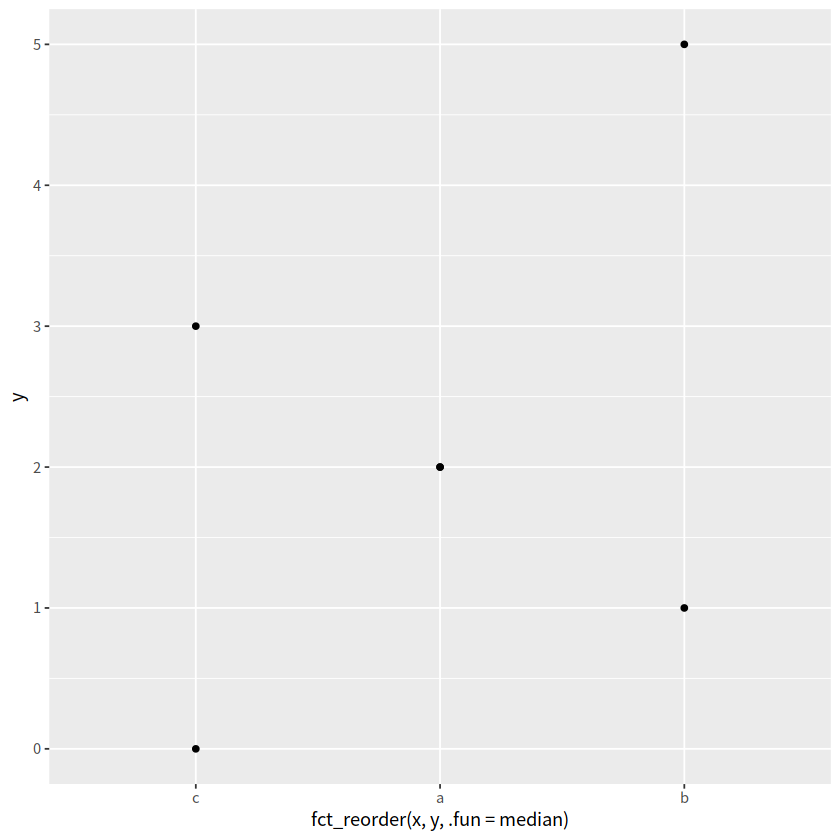

In [11]:
d %>% 
  ggplot(aes(x = fct_reorder(x, y, .fun=median), y = y)) + 
  geom_point()

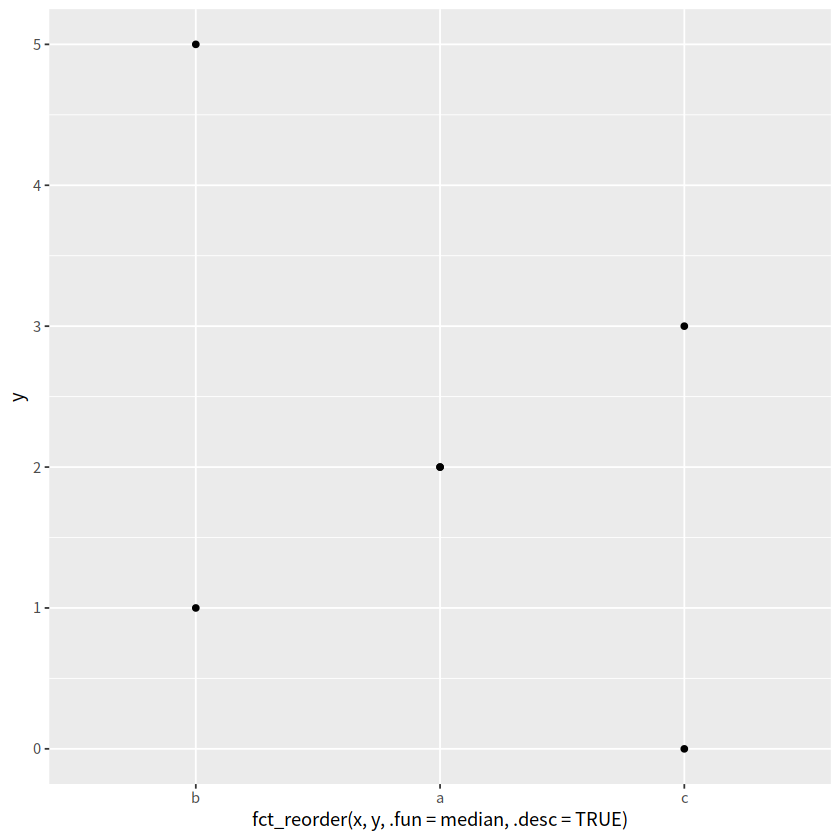

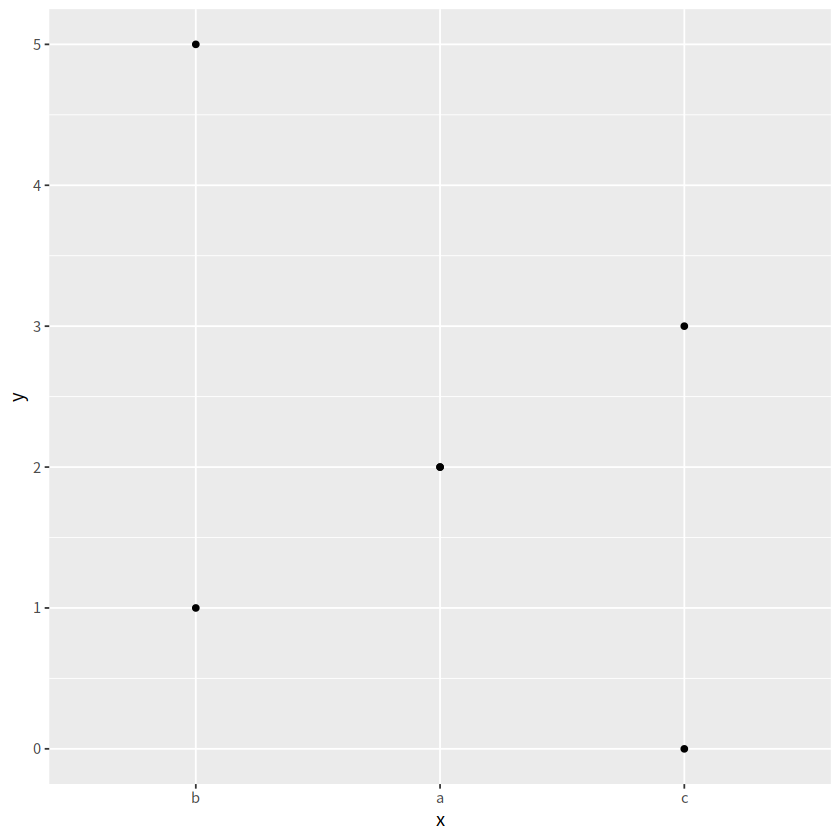

In [12]:
d %>% 
  ggplot(aes(x = fct_reorder(x,y, .fun=median, .desc=TRUE), y = y)) + 
  geom_point()
d %>% 
  mutate(x = fct_reorder(x, y, .fun=median, .desc=TRUE)) %>% 
  ggplot(aes(x = x, y = y)) +
  geom_point()

###  `fct_rev()`
按照因子层级的逆序排序

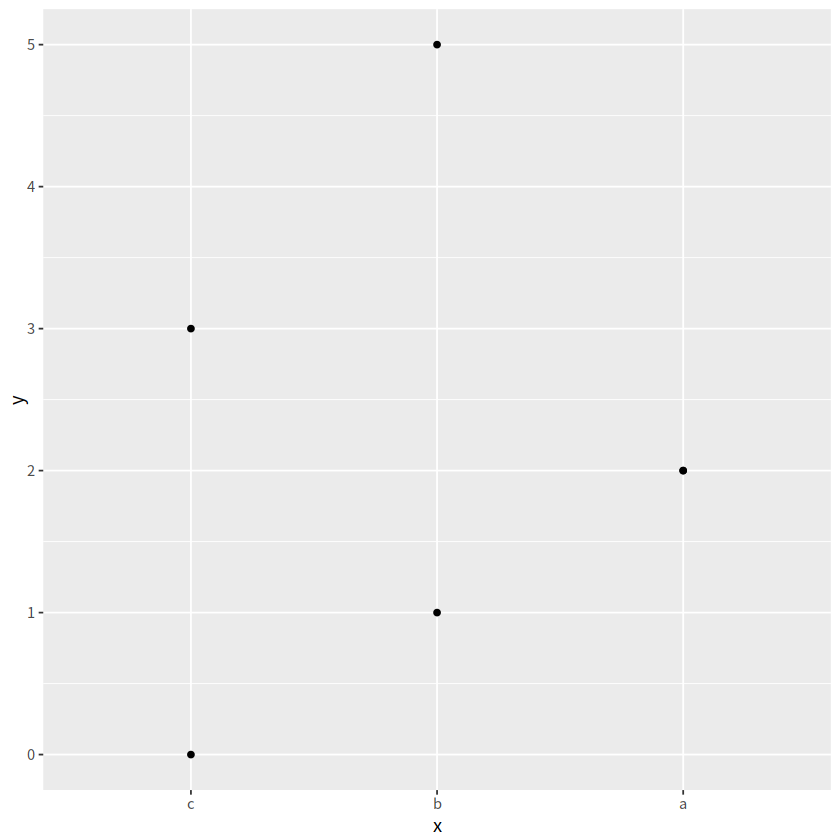

In [13]:
d %>% 
  mutate(x = fct_rev(x)) %>% 
  ggplot(aes(x, y)) + 
  geom_point()

### `fct_relevel()`

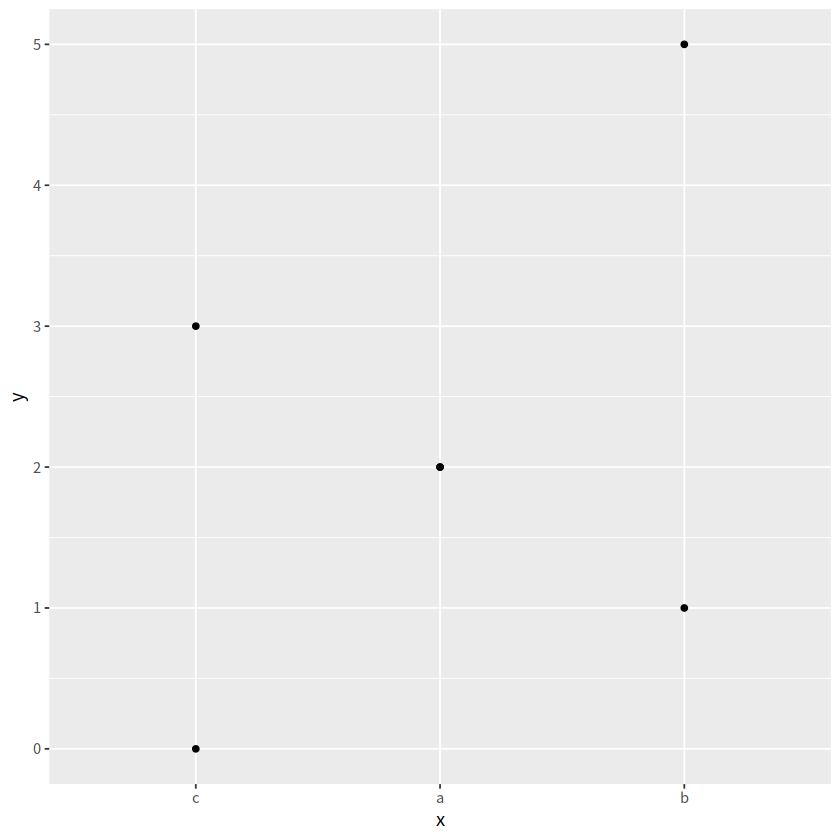

In [14]:
d %>% 
  mutate(
    x = fct_relevel(x, c("c", "a", "b"))
  ) %>% 
  ggplot(aes(x, y))+
  geom_point()

## 可视化中应用

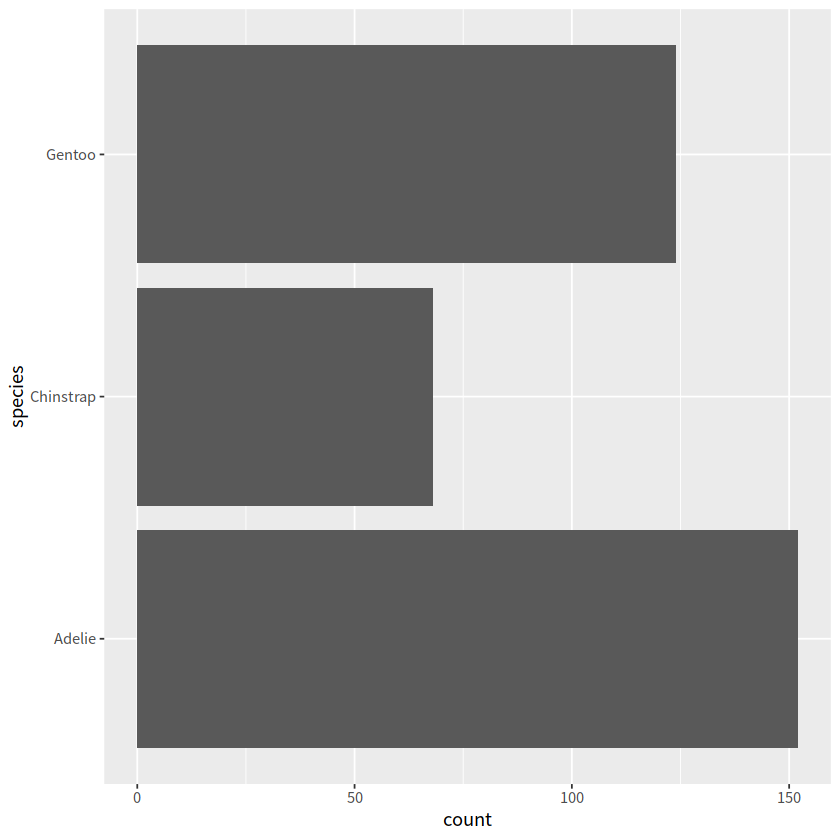

In [15]:
library(palmerpenguins)

ggplot(penguins, aes(y=species))+
  geom_bar()

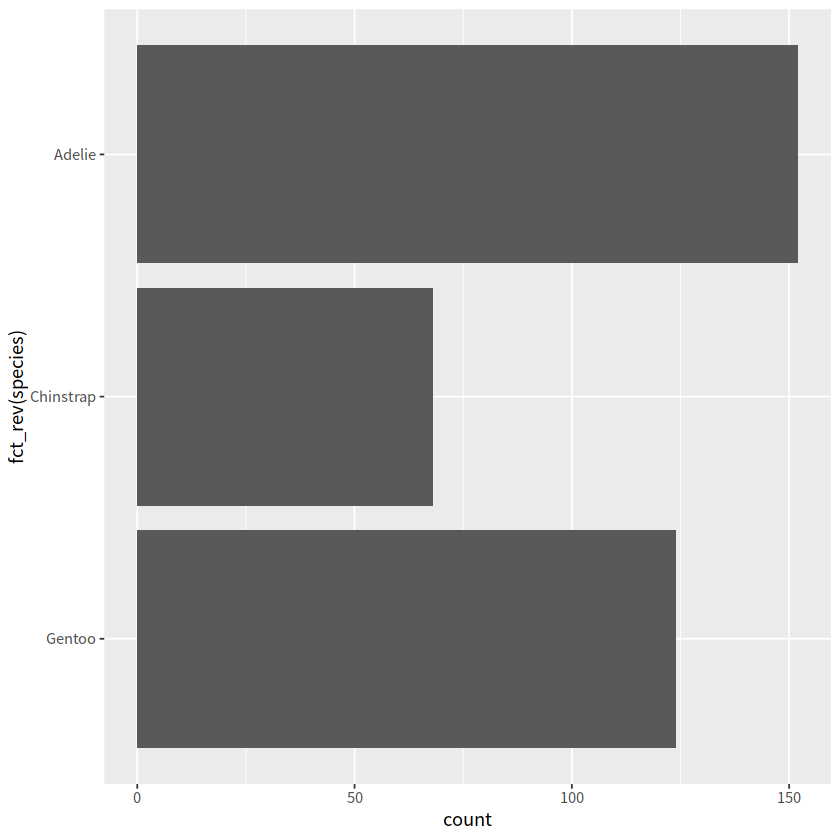

In [16]:
# 按species逆序
ggplot(penguins, aes(y = fct_rev(species)))+
  geom_bar()

[1] Adelie    Chinstrap Gentoo   
Levels: Adelie Chinstrap Gentoo

[1] Adelie    Chinstrap Gentoo   
Levels: Chinstrap Gentoo Adelie

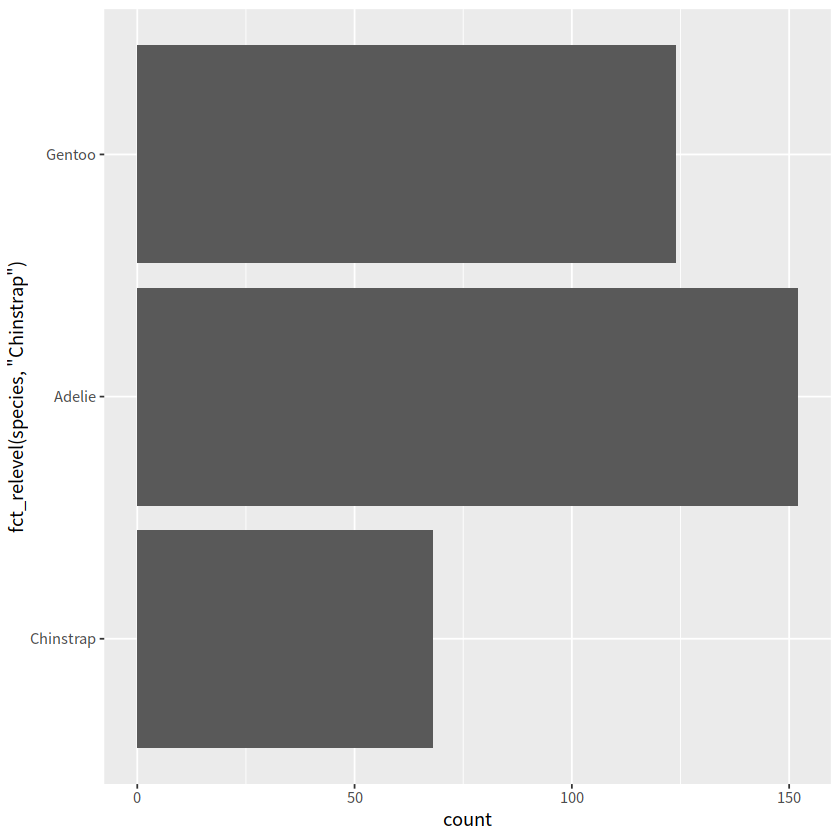

In [17]:
penguins %>% 
  count(species) %>% 
  pull(species)

penguins %>% 
  count(species) %>% 
  mutate(species = fct_relevel(species, c("Chinstrap", "Gentoo", "Adelie"))) %>% 
  pull(species)

# 把Chinstrap移到前面, 其他顺序不变
ggplot(penguins, aes(y = fct_relevel(species, "Chinstrap"))) +
  geom_bar()

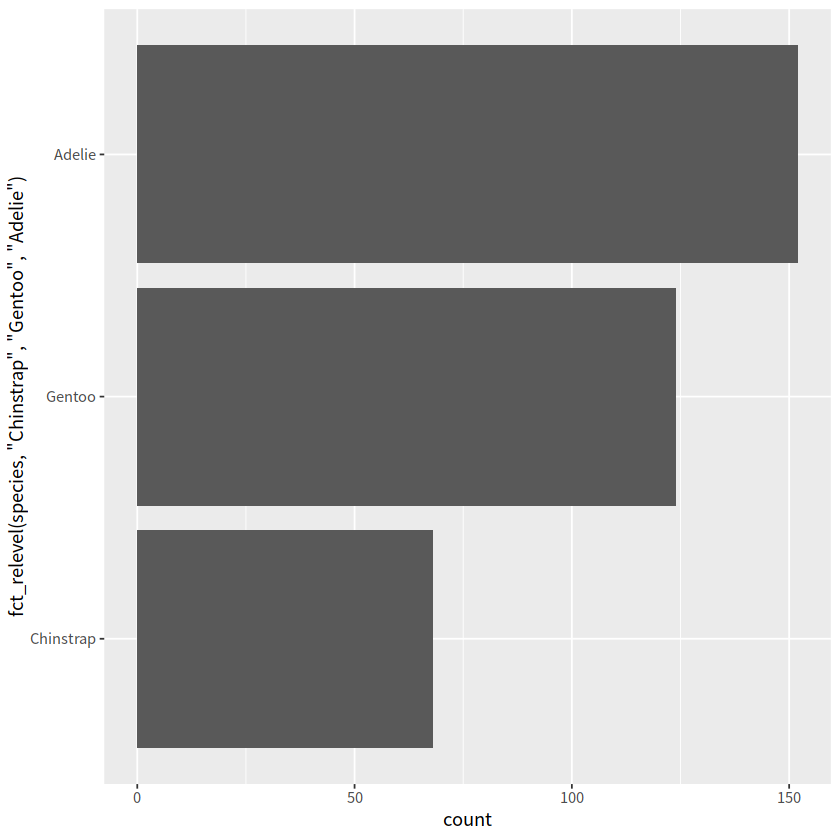

In [18]:
# Use order "Chinstrap", "Gentoo", "Adelie"
ggplot(penguins, aes(y = fct_relevel(species, "Chinstrap", "Gentoo", "Adelie"))) +
  geom_bar()

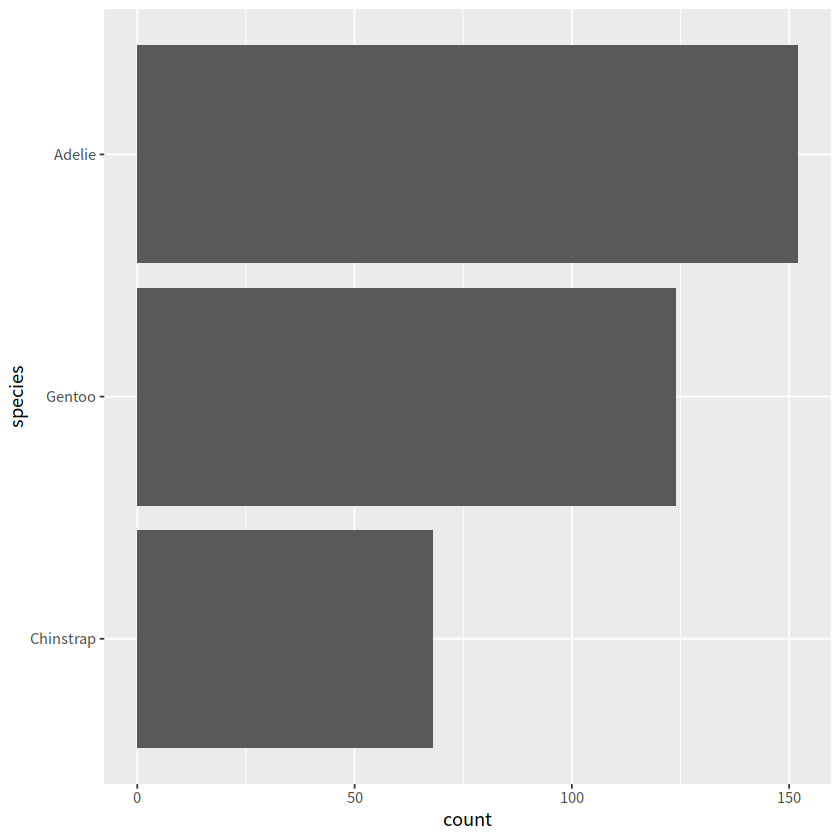

In [19]:
penguins %>% 
  mutate(species = fct_relevel(species, "Chinstrap", "Gentoo", "Adelie")) %>% 
  ggplot(aes( y = species))+
  geom_bar()

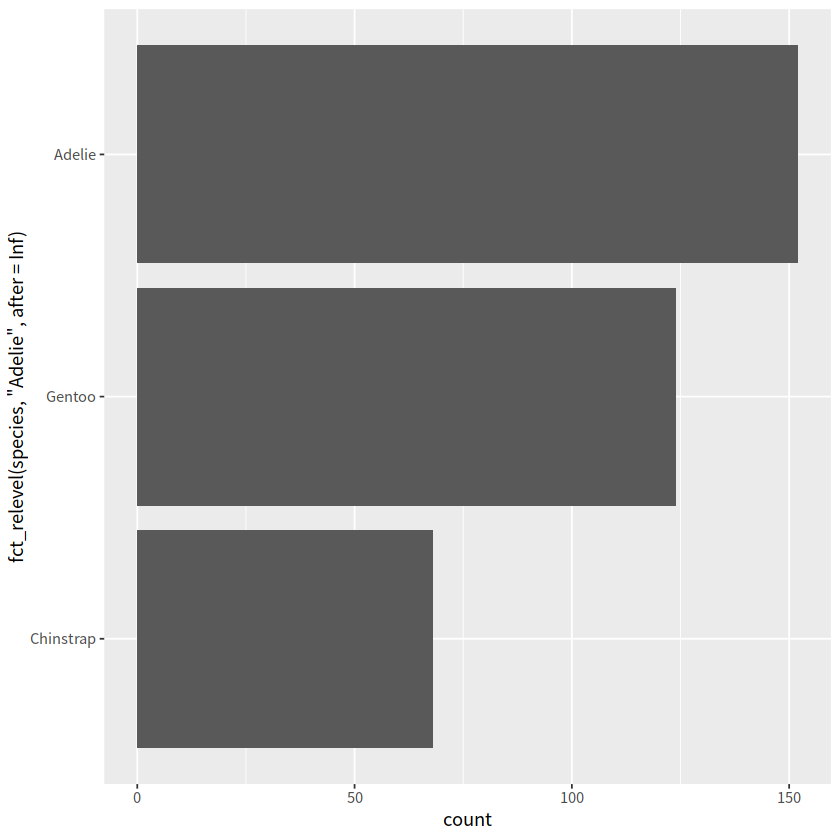

In [20]:
# 把Adelie放到最后
ggplot(penguins, aes(y = fct_relevel(species, "Adelie", after=Inf)))+
  geom_bar()

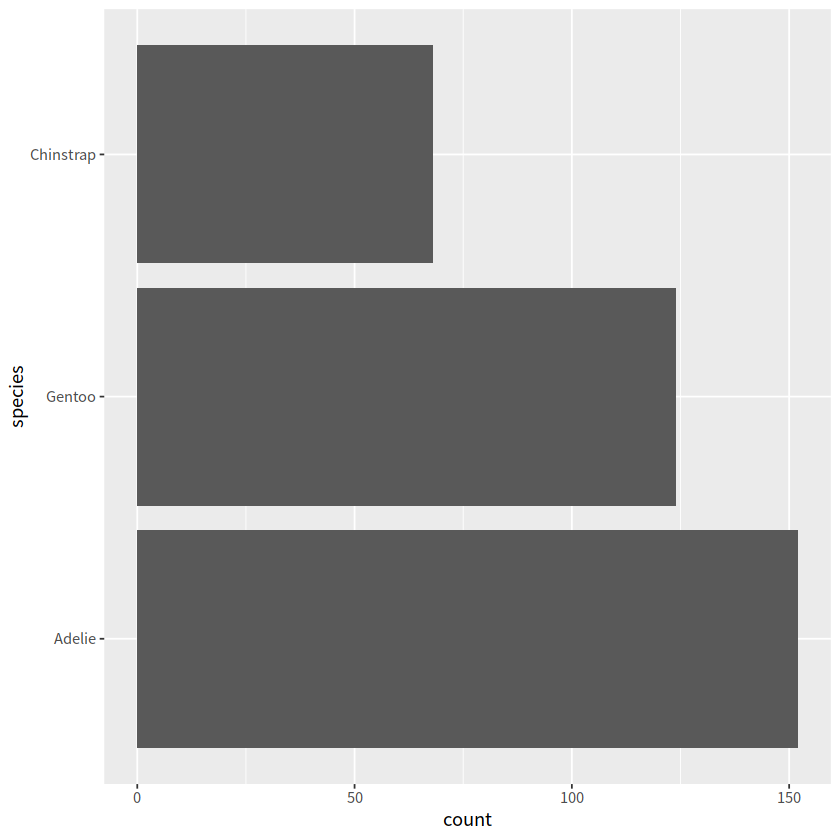

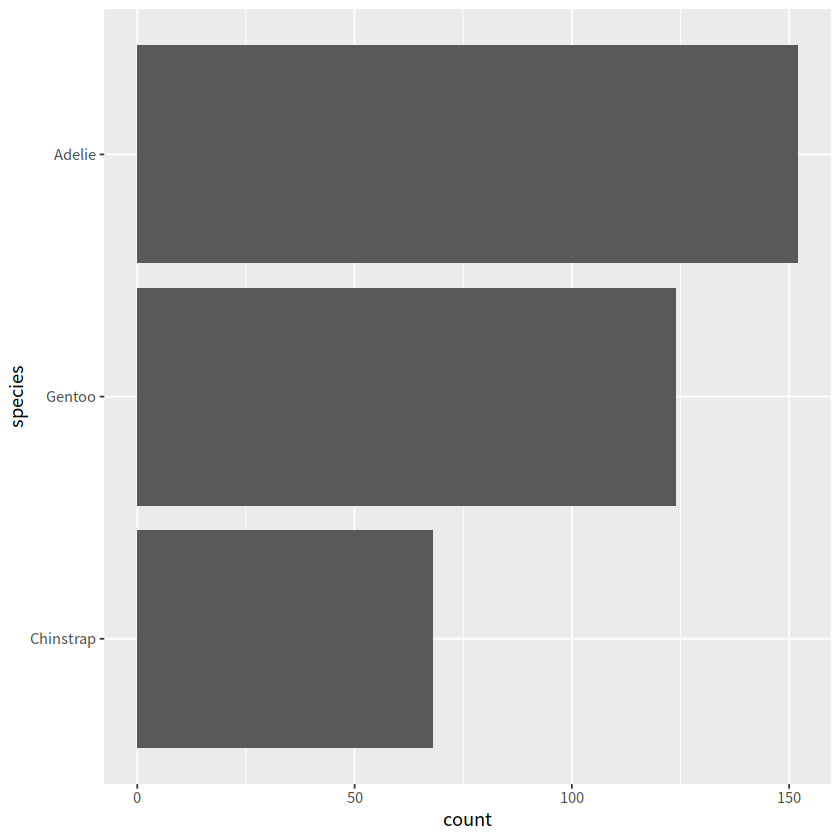

In [21]:
# fct_infreq() 按照因子频率，从小到大
penguins %>% 
  mutate(species = fct_infreq(species)) %>% 
  ggplot(aes(y = species))+
  geom_bar()

penguins %>% 
  mutate(species = fct_rev(fct_infreq(species))) %>% 
  ggplot(aes(y = species))+
  geom_bar()

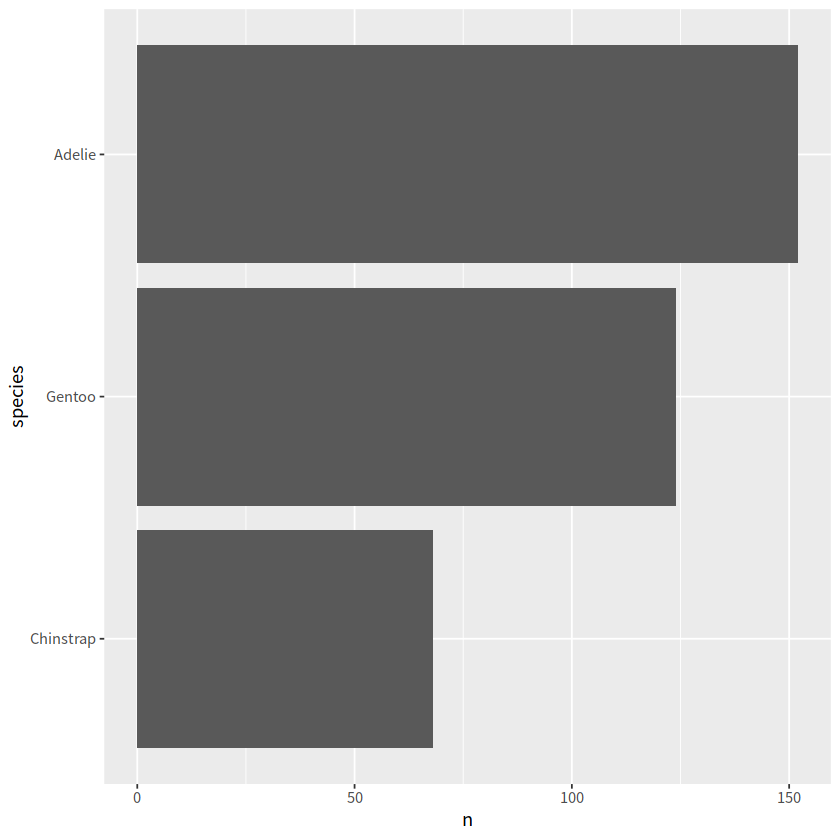

In [22]:
# n是count()函数产生的结果
penguins %>% 
  count(species) %>% 
  mutate(species = fct_reorder(species, n)) %>% 
  ggplot(aes(n, species))+
  geom_col()

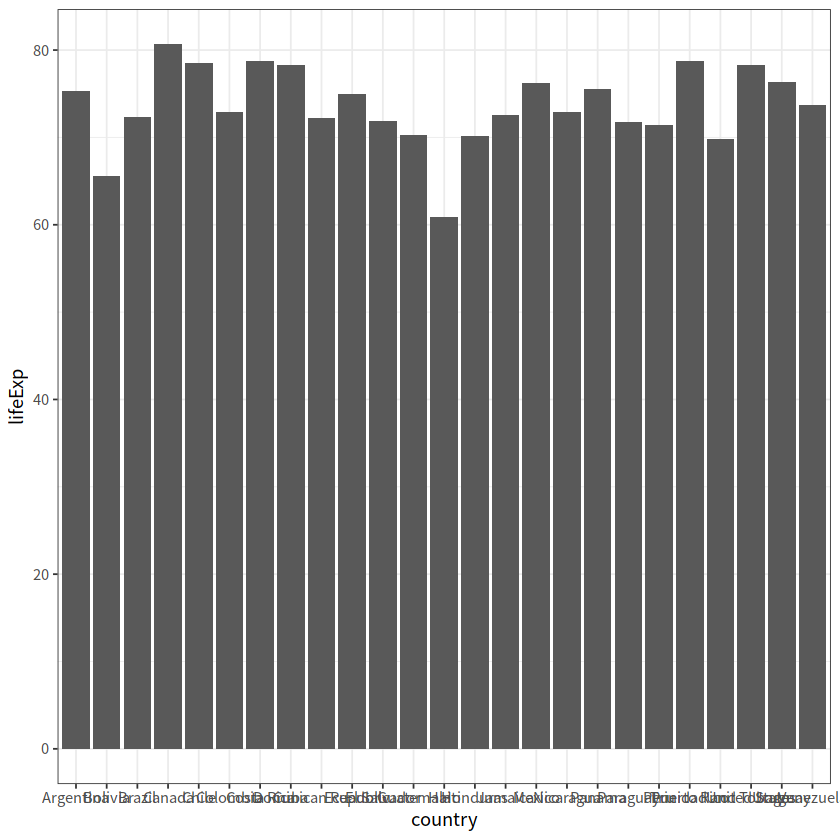

In [23]:
# 画出的2007年美洲人口寿命的柱状图，要求从高到低排序

library(gapminder) # install.packages("gapminder")
gapminder %>% 
  filter(year == 2007 & continent == "Americas") %>% 
  ggplot(aes(x = country, y = lifeExp))+
  geom_col()+
  theme_bw()

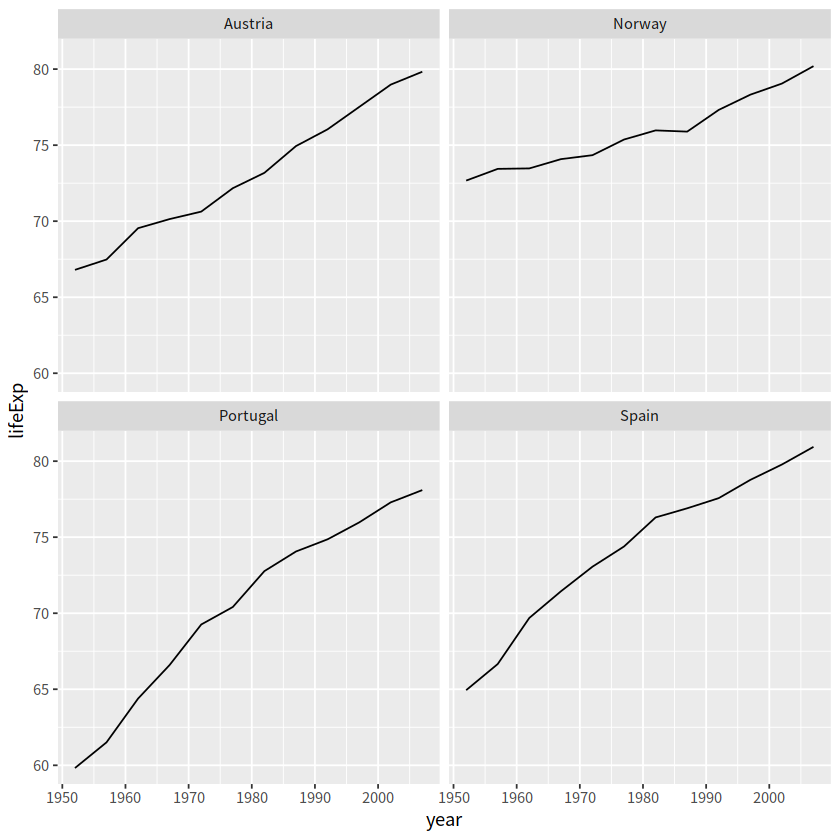

In [24]:
# 四个国家人口寿命的变化图
gapminder %>%
  filter(country %in% c("Norway", "Portugal", "Spain", "Austria")) %>%
  ggplot(aes(year, lifeExp)) + 
  geom_line() +
  facet_wrap(vars(country), nrow = 2)

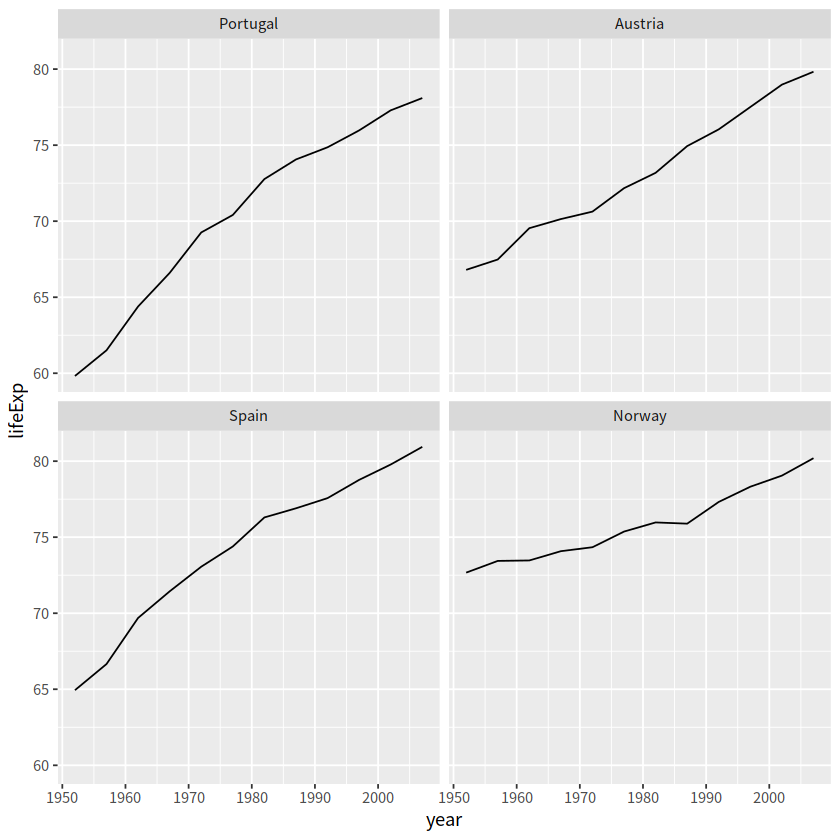

In [25]:
# 按每个国家寿命的中位数
gapminder %>%
  filter(country %in% c("Norway", "Portugal", "Spain", "Austria")) %>%
  mutate(country = fct_reorder(country, lifeExp, .fun=median)) %>% 
  ggplot(aes(year, lifeExp)) +  
  geom_line() +
  facet_wrap(vars(country), nrow = 2)

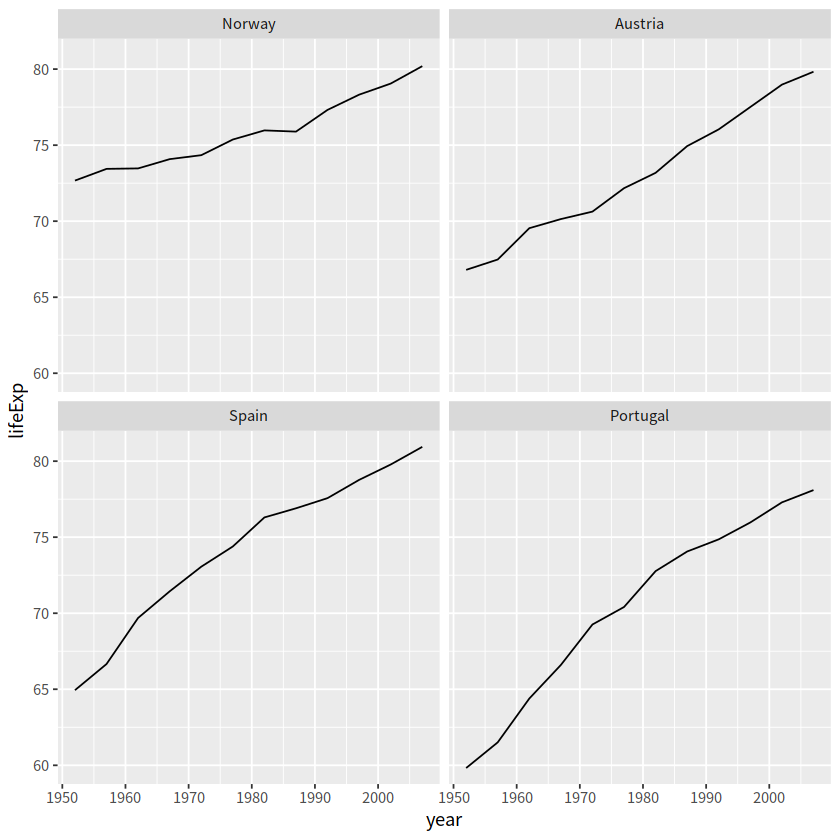

In [26]:
# 按每个国家寿命差（最大值减去最小值）
cha <- function(x){
    max(x) - min(x)
}

gapminder %>%
  filter(country %in% c("Norway", "Portugal", "Spain", "Austria")) %>%
  mutate(country = fct_reorder(country, lifeExp, .fun=cha)) %>% 
  ggplot(aes(year, lifeExp)) +  
  geom_line() +
  facet_wrap(vars(country), nrow = 2)

# 简单数据框
##  `tidyverse` 家族
前面陆续介绍了`tidyverse`家族，家庭主要成员包括

功能	|宏包
------ | ------
有颜值担当	|`ggplot2`
数据处理王者	|`dplyr`
数据转换专家	|`tidyr`
数据载入利器	|`readr`
循环加速器	|`purrr`
强化数据框	|`tibble`
字符串处理	|`stringr`
因子处理|	`forcats`

## 人性化的`tibble`
![image.png](image/tibble.png)
- `tibble`是用来替换`data.frame`类型的扩展的数据框
- `tibble`继承了`data.frame`，是弱类型的。换句话说，`tibble`是`data.frame`的子类型
- `tibble`与`data.frame`有相同的语法，使用起来更方便
- `tibble`更早的检查数据，方便写出更干净、更多富有表现力的代码

`tibble`对`data.frame`做了重新的设定：

- `tibble`，不关心输入类型，可存储任意类型，包括`list`类型
- `tibble`，没有行名设置 `row.names`
- `tibble`，支持任意的列名
- `tibble`，会自动添加列名
- `tibble`，类型只能回收长度为1的输入
- `tibble`，会懒加载参数，并按顺序运行
- `tibble`，是`tbl_df`类型

## tibble 与 data.frame

In [27]:
# 传统创建数据框
data.frame(
  a = 1:5,
  b = letters[1:5]
)

a,b
<int>,<chr>
1,a
2,b
3,c
4,d
5,e


发现，`data.frame()`会自动将**字符串型**的变量转换成**因子型**，如果想保持原来的字符串型，就得

In [28]:
data.frame(
  a = 1:5,
  b = letters[1:5],
  stringsAsFactors = FALSE
)

a,b
<int>,<chr>
1,a
2,b
3,c
4,d
5,e


Note： - 在`R 4.0` 后，`data.frame()` 不会将字符串型变量自动转换成因子型

用`tibble`创建数据框，不会这么麻烦，输出的就是原来的字符串类型

In [29]:
tibble(
  a = 1:5,
  b = letters[1:5]
)

a,b
<int>,<chr>
1,a
2,b
3,c
4,d
5,e


构建两个有关联的变量，传统的`data.frame()`会报错

In [30]:
tb <- tibble(
  x = 1:3,
  y = x+2)
tb

df <- data.frame(
  x = 1:3,
  y = x+2
)

x,y
<int>,<dbl>
1,3
2,4
3,5


Warning message in Ops.factor(x, 2):
“‘+’ not meaningful for factors”


ERROR: Error in data.frame(x = 1:3, y = x + 2): 参数值意味着不同的行数: 3, 7


`tibble`用缩写定义了7种类型：

类型	|含义
------|------
`int`	|代表`integer`
`dbl`	|代表`double`
`chr`	|代表`character`向量或字符串
`dttm`	|代表日期+时间(`date`+`time`)
`lgl`	|代表逻辑判断`TRUE`或者`FALSE`
`fctr`	|代表因子类型`factor`
`date`	|代表日期`dates`

## `tibble`数据操作
### 1 创建`tibble`
- `tibble()` 创建方式和`data.frame()`一样
- `tibble::tribble()`更加直观

In [92]:
# tibble()创建一个tibble类型的data.frame:
tibble(a = 1:5, b = letters[1:5])
tibble(a = 1:5,
      b = 10:14,
      c = a + b)

a,b
<int>,<chr>
1,a
2,b
3,c
4,d
5,e


a,b,c
<int>,<int>,<int>
1,10,11
2,11,13
3,12,15
4,13,17
5,14,19


In [94]:
# 为了让每列更加直观，也可以tribble()创建，数据量不大的时候
tibble::tribble(
  ~x , ~y, ~z,
  "a", 2, 3.6,
  "b", 1, 8.5
)

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


### 2 转换成`tibble`类型
转换成`tibble`类型意思就是说，刚开始不是`tibble`, 现在转换成`tibble`， 包括

- `data.frame`转换成`tibble`
  - `as_tibble()`
  - `runif(n, min=0, max=1)`生成n个0-1之间的均匀分布随机数
  - `as.data.frame()`转回去
- `vector`转换成`tibble`
- `list`转换成`tibble`
  - `as.list()`转回去
- `matrix`转换成`tibble`
  - `tibble`转回`matrix`? `as.matrix()`

In [100]:
# data.frame转换成tibble
t1 <- iris[1:6, 1:4]
class(t1)

as_tibble(t1)

[1] "data.frame"

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [98]:
# vector转型到tibble
x <- as_tibble(1:5)
x

value
<int>
1
2
3
4
5


In [99]:
# 把list转型为tibble
df <- as_tibble(list(x = 1:6, y = runif(6), z= 6:1))
df
# 把tibble再转为list? as.list(df)

x,y,z
<int>,<dbl>,<int>
1,0.1811488,6
2,0.1814234,5
3,0.9660758,4
4,0.7322563,3
5,0.5179424,2
6,0.0505204,1


In [102]:
#  把matrix转型为tibble
m <- matrix(rnorm(15), ncol=5)
m
as_tibble(m)
# tibble转回matrix? as.matrix(df)

-0.7579117,1.4238270,1.2555227,-0.5938130,1.0590847
0.2615187,0.6355597,0.7695958,0.3268994,-1.3785640
-1.2224583,-0.9355717,0.5463617,0.5253380,-0.9228583


V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.7579117,1.4238270,1.2555227,-0.5938130,1.0590847
0.2615187,0.6355597,0.7695958,0.3268994,-1.3785640
-1.2224583,-0.9355717,0.5463617,0.5253380,-0.9228583


### 3 `tibble`简单操作
- 增加一列
  - `add_column()`
  - `mutate()`
- 增加一行
  - `add_row()` 默认加在最后
  - `.before=n`指定加在哪一行

In [103]:
# 构建一个简单的数据框
df <- tibble(
  x = 1:2,
  y = 2:1
)
df

x,y
<int>,<int>
1,2
2,1


In [106]:
# 增加一列
add_column(df, z = 0:1, w = 0)

df %>% 
  mutate(z = 0:1,
         w = 0)

x,y,z,w
<int>,<int>,<int>,<dbl>
1,2,0,0
2,1,1,0


x,y,z,w
<int>,<int>,<int>,<dbl>
1,2,0,0
2,1,1,0


In [108]:
# 增加一行
add_row(df, x = 99, y = 9)

# 在第二行，增加一行
add_row(df, x = 99, y = 9, .before=2)

x,y
<dbl>,<dbl>
1,2
2,1
99,9


x,y
<dbl>,<dbl>
1,2
99,9
2,1


### 4 有用的函数`lst`
- `lst`，创建一个`list`，具有`tibble`特性的`list`。

In [110]:
tibble::lst(n = 5, x = runif(n), y = TRUE)

$n
[1] 5

$x
[1] 0.9104659 0.3659227 0.4856018 0.8365256 0.2919834

$y
[1] TRUE

### 5 有用的函数`enframe`
- `enframe()`将矢量快速创建`tibble`，创建的`tibble`只有2列: `name`和`value`

In [111]:
enframe(1:3)

name,value
<int>,<int>
1,1
2,2
3,3


In [112]:
enframe(c(a = 5, b = 7, c = 9))

name,value
<chr>,<dbl>
a,5
b,7
c,9


### 6 有用的函数`deframe`
- `deframe()`可以看做是`enframe()`的反操作，把`tibble`反向转成向量

In [114]:
df <- enframe(c(a = 5, b = 7))
df

deframe(df)

name,value
<chr>,<dbl>
a,5
b,7


a b 
5 7

### 7 读取文件
- `read_csv()`读取文件时，生成的直接就是`tibble`

In [120]:
read_csv("./test.csv")

Rows: 2 Columns: 3
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


## 关于行名
`data.frame`是支持行名的，但`tibble`不支持行名，这也是两者不同的地方
- `has_rownames(df)` 判断是否有行名
- `rownames_to_column(df, var="rowname")`把df的行名转换为单独的一列`rowname`，没行索引了就
- `rowid_to_column(df, var="rowid")`把df的把行索引转换为单独的一列,多一列`rowid`

In [125]:
# dataframe 支持行名
df <- data.frame(x = 1:3, y = 3:1)

row.names(df) <- LETTERS[1:3]
df

print("判断是否有行名")
has_rownames(df)

# tibble 不支持行名
tb <- tibble(x = 1:3, y = 3:1)

row.names(tb) <- LETTERS[1:3]

,x,y
,<int>,<int>
A,1,3
B,2,2
C,3,1


[1] "判断是否有行名"


[1] TRUE

Warning message:
“Setting row names on a tibble is deprecated.”


需要注意的：

- 有时候遇到含有行名的`data.frame`，转换成`tibble`后，**行名会被丢弃**
- 如果想保留行名，就需要把行名转换成单独的一列

In [133]:
df <- mtcars[1:3, 1:3]
df

# 把行名转换为单独的一列
rownames_to_column(df, var = "myrow")

# 这俩是添加一列，但行名还在
df$rowname <- rownames(df)
df

df %>% 
  mutate(rowname = rownames(df))

,mpg,cyl,disp
,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160
Mazda RX4 Wag,21.0,6,160
Datsun 710,22.8,4,108


myrow,mpg,cyl,disp
<chr>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160
Mazda RX4 Wag,21.0,6,160
Datsun 710,22.8,4,108


,mpg,cyl,disp,rowname
,<dbl>,<dbl>,<dbl>,<chr>
Mazda RX4,21.0,6,160,Mazda RX4
Mazda RX4 Wag,21.0,6,160,Mazda RX4 Wag
Datsun 710,22.8,4,108,Datsun 710


,mpg,cyl,disp,rowname
,<dbl>,<dbl>,<dbl>,<chr>
Mazda RX4,21.0,6,160,Mazda RX4
Mazda RX4 Wag,21.0,6,160,Mazda RX4 Wag
Datsun 710,22.8,4,108,Datsun 710


In [135]:
# 把行索引转换为单独的一列
rowid_to_column(df, var="rowid")

rowid,mpg,cyl,disp,rowname
<int>,<dbl>,<dbl>,<dbl>,<chr>
1,21.0,6,160,Mazda RX4
2,21.0,6,160,Mazda RX4 Wag
3,22.8,4,108,Datsun 710


## 修复列名
规范的来说，数据框的列名应该是唯一。但现实中代码是人写的，因此可能会稀奇古怪的，所幸的是`tibble`也提供了人性化的解决方案
- `.name_repair = "check_unique"` 检查列名唯一性，但不做修复（默认）

- `.name_repair = "minimal"`， 不检查也不修复，维持现状

- `.name_repair = "unique"` 修复列名，使得列名唯一且不为空

- `.name_repair = "universal"` 修复列名，使得列名唯一且语法可读

- `make.unique(.x, sep="_")`指定修复函数

In [136]:
tibble(x = 1, x = 2)

ERROR: [1m[33mError[39m in `tibble()`:[22m
[1m[22m[33m![39m Column name `x` must not be duplicated.
Use `.name_repair` to specify repair.
[1mCaused by error in `repaired_names()`:[22m
[33m![39m Names must be unique.
[31m✖[39m These names are duplicated:
  * "x" at locations 1 and 2.


In [142]:
tibble(x = 1, x = 2, .name_repair = "minimal")
tibble(x = 1, x = 2, .name_repair = "unique")
tibble(x = 1, x = 2, .name_repair = "universal")

x,x
<dbl>,<dbl>
1,2


New names:
• `x` -> `x...1`
• `x` -> `x...2`


x...1,x...2
<dbl>,<dbl>
1,2


New names:
• `x` -> `x...1`
• `x` -> `x...2`


x...1,x...2
<dbl>,<dbl>
1,2


In [144]:
tibble(x = 1, x = 2, .name_repair = make.unique) # 指定修复函数
tibble(x = 1, x = 2, .name_repair = ~make.unique(.x, sep = "_"))
tibble(x = 1, x = 2, .name_repair = ~make.names(., unique = TRUE))

x,x.1
<dbl>,<dbl>
1,2


x,x_1
<dbl>,<dbl>
1,2


x,x.1
<dbl>,<dbl>
1,2


注意`make.unique(names, sep = ".")`和`make.names(names, unique = FALSE, allow_ = TRUE)` 是基础包的函数

## `List-columns`(列表列)
`tibble` 本质上是向量构成的列表
  - ![image.png](image/tibble.png.1)

大多情况下，我们接触到的向量是原子型向量(`atomic vectors`)，所谓原子型向量就是向量元素为单个值，比如 "`a`" 或者 `1`
  - ![image-2.png](image/tibble-atomic.png)
  
`tibble`还有可以允许某一列为列表(`list`)，那么列表构成的列，称之为列表列（`list columns`）
  - ![image-3.png](image/tibble-list-col.png)
 
这样一来，列表列非常灵活，因为列表元素可以是原子型向量、列表、矩阵或者小的`tibble`
  - ![image-4.png](image/tibble-list-col-vectors.png)

## `nested tibble`
`tibble`的列表列装载数据的能力很强大，也很灵活。

如何创建和操控有列表列的`tibble`。
### 1 `creating`
假定我们这里有一个`tibble`， 我们有三种方法可以创建列表列
- `nest()`
- `summarise()` and `list()`
- `mutate()` and `map()`
  ### `tidyr::nest()`创建
使用`tidyr::nest(data = c())`函数，创建有列表列的`tibble`, `data`指定那几列合成列表列`data`。![image.png](image/tibble-list-col-tibbles.png)

   除了x列外的其他列就可用`nest(data = !x)`


In [156]:
# tidyr::nest()
library(tidyverse)
library(palmerpenguins)
df <- penguins %>% 
  drop_na() %>% 
  select(species, bill_length_mm, bill_depth_mm, body_mass_g)
df %>% head()

tb <- df %>% 
  tidyr::nest(data = c(bill_length_mm, bill_depth_mm, body_mass_g))
tb %>% head()

species,bill_length_mm,bill_depth_mm,body_mass_g
<fct>,<dbl>,<dbl>,<int>
Adelie,39.1,18.7,3750
Adelie,39.5,17.4,3800
Adelie,40.3,18.0,3250
Adelie,36.7,19.3,3450
Adelie,39.3,20.6,3650
Adelie,38.9,17.8,3625


species,data
<fct>,<list>
Adelie,"39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5, 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8, 19.0, 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17.0, 21.1, 20.0, 18.5, 19.3, 19.1, 18.0, 18.4, 18.5, 19.7, 16.9, 18.8, 19.0, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17.0, 18.2, 17.1, 18.0, 16.2, 19.1, 16.6, 19.4, 19.0, 18.4, 17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18.0, 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20.0, 16.0, 20.0, 18.6, 18.9, 17.2, 20.0, 17.0, 19.0, 16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17.0, 20.5, 17.0, 18.6, 17.2, 19.8, 17.0, 18.5, 15.9, 19.0, 17.6, 18.3, 17.1, 18.0, 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5, 17.0, 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17.1, 18.5, 3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0, 3800.0, 3550.0, 3200.0, 3150.0, 3950.0, 3250.0, 3900.0, 3300.0, 3900.0, 3325.0, 4150.0, 3950.0, 3550.0, 3300.0, 4650.0, 3150.0, 3900.0, 3100.0, 4400.0, 3000.0, 4600.0, 3425.0, 3450.0, 4150.0, 3500.0, 4300.0, 3450.0, 4050.0, 2900.0, 3700.0, 3550.0, 3800.0, 2850.0, 3750.0, 3150.0, 4400.0, 3600.0, 4050.0, 2850.0, 3950.0, 3350.0, 4100.0, 3050.0, 4450.0, 3600.0, 3900.0, 3550.0, 4150.0, 3700.0, 4250.0, 3700.0, 3900.0, 3550.0, 4000.0, 3200.0, 4700.0, 3800.0, 4200.0, 3350.0, 3550.0, 3800.0, 3500.0, 3950.0, 3600.0, 3550.0, 4300.0, 3400.0, 4450.0, 3300.0, 4300.0, 3700.0, 4350.0, 2900.0, 4100.0, 3725.0, 4725.0, 3075.0, 4250.0, 2925.0, 3550.0, 3750.0, 3900.0, 3175.0, 4775.0, 3825.0, 4600.0, 3200.0, 4275.0, 3900.0, 4075.0, 2900.0, 3775.0, 3350.0, 3325.0, 3150.0, 3500.0, 3450.0, 3875.0, 3050.0, 4000.0, 3275.0, 4300.0, 3050.0, 4000.0, 3325.0, 3500.0, 3500.0, 4475.0, 3425.0, 3900.0, 3175.0, 3975.0, 3400.0, 4250.0, 3400.0, 3475.0, 3050.0, 3725.0, 3000.0, 3650.0, 4250.0, 3475.0, 3450.0, 3750.0, 3700.0, 4000.0"
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9, 13.2, 16.3, 14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 16.1, 13.7, 14.6, 14.6, 15.7, 13.5, 15.2, 14.5, 15.1, 14.3, 14.5, 14.5, 15.8, 13.1, 15.1, 15.0, 14.3, 15.3, 15.3, 14.2, 14.5, 17.0, 14.8, 16.3, 13.7, 17.3, 13.6, 15.7, 13.7, 16.0, 13.7, 15.0, 15.9, 13.9, 13.9, 15.9, 13.3, 15.8, 14.2, 14.1, 14.4, 15.0, 14.4, 

`nest() `为每种species创建了一个小的`tibble`， 每个小的`tibble`对应一个species

In [161]:
tb$data[[1]] %>% head()
tb$data %>% typeof()
tb$data %>% class()

bill_length_mm,bill_depth_mm,body_mass_g
<dbl>,<dbl>,<int>
39.1,18.7,3750
39.5,17.4,3800
40.3,18.0,3250
36.7,19.3,3450
39.3,20.6,3650
38.9,17.8,3625


[1] "list"

[1] "list"

In [162]:
# 除了species列之外的其他列组合成list_columns
df %>% 
  nest(data = !species)

species,data
<fct>,<list>
Adelie,"39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5, 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8, 19.0, 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17.0, 21.1, 20.0, 18.5, 19.3, 19.1, 18.0, 18.4, 18.5, 19.7, 16.9, 18.8, 19.0, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17.0, 18.2, 17.1, 18.0, 16.2, 19.1, 16.6, 19.4, 19.0, 18.4, 17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18.0, 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20.0, 16.0, 20.0, 18.6, 18.9, 17.2, 20.0, 17.0, 19.0, 16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17.0, 20.5, 17.0, 18.6, 17.2, 19.8, 17.0, 18.5, 15.9, 19.0, 17.6, 18.3, 17.1, 18.0, 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5, 17.0, 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17.1, 18.5, 3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0, 3800.0, 3550.0, 3200.0, 3150.0, 3950.0, 3250.0, 3900.0, 3300.0, 3900.0, 3325.0, 4150.0, 3950.0, 3550.0, 3300.0, 4650.0, 3150.0, 3900.0, 3100.0, 4400.0, 3000.0, 4600.0, 3425.0, 3450.0, 4150.0, 3500.0, 4300.0, 3450.0, 4050.0, 2900.0, 3700.0, 3550.0, 3800.0, 2850.0, 3750.0, 3150.0, 4400.0, 3600.0, 4050.0, 2850.0, 3950.0, 3350.0, 4100.0, 3050.0, 4450.0, 3600.0, 3900.0, 3550.0, 4150.0, 3700.0, 4250.0, 3700.0, 3900.0, 3550.0, 4000.0, 3200.0, 4700.0, 3800.0, 4200.0, 3350.0, 3550.0, 3800.0, 3500.0, 3950.0, 3600.0, 3550.0, 4300.0, 3400.0, 4450.0, 3300.0, 4300.0, 3700.0, 4350.0, 2900.0, 4100.0, 3725.0, 4725.0, 3075.0, 4250.0, 2925.0, 3550.0, 3750.0, 3900.0, 3175.0, 4775.0, 3825.0, 4600.0, 3200.0, 4275.0, 3900.0, 4075.0, 2900.0, 3775.0, 3350.0, 3325.0, 3150.0, 3500.0, 3450.0, 3875.0, 3050.0, 4000.0, 3275.0, 4300.0, 3050.0, 4000.0, 3325.0, 3500.0, 3500.0, 4475.0, 3425.0, 3900.0, 3175.0, 3975.0, 3400.0, 4250.0, 3400.0, 3475.0, 3050.0, 3725.0, 3000.0, 3650.0, 4250.0, 3475.0, 3450.0, 3750.0, 3700.0, 4000.0"
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9, 13.2, 16.3, 14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 16.1, 13.7, 14.6, 14.6, 15.7, 13.5, 15.2, 14.5, 15.1, 14.3, 14.5, 14.5, 15.8, 13.1, 15.1, 15.0, 14.3, 15.3, 15.3, 14.2, 14.5, 17.0, 14.8, 16.3, 13.7, 17.3, 13.6, 15.7, 13.7, 16.0, 13.7, 15.0, 15.9, 13.9, 13.9, 15.9, 13.3, 15.8, 14.2, 14.1, 14.4, 15.0, 14.4, 

In [163]:
# 同时创建多个列表列
df %>% 
  nest(data1 = c(bill_length_mm, bill_depth_mm), data2 = body_mass_g)

species,data1,data2
<fct>,<list>,<list>
Adelie,"39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5, 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8, 19.0, 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17.0, 21.1, 20.0, 18.5, 19.3, 19.1, 18.0, 18.4, 18.5, 19.7, 16.9, 18.8, 19.0, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17.0, 18.2, 17.1, 18.0, 16.2, 19.1, 16.6, 19.4, 19.0, 18.4, 17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18.0, 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20.0, 16.0, 20.0, 18.6, 18.9, 17.2, 20.0, 17.0, 19.0, 16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17.0, 20.5, 17.0, 18.6, 17.2, 19.8, 17.0, 18.5, 15.9, 19.0, 17.6, 18.3, 17.1, 18.0, 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5, 17.0, 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17.1, 18.5","3750, 3800, 3250, 3450, 3650, 3625, 4675, 3200, 3800, 4400, 3700, 3450, 4500, 3325, 4200, 3400, 3600, 3800, 3950, 3800, 3800, 3550, 3200, 3150, 3950, 3250, 3900, 3300, 3900, 3325, 4150, 3950, 3550, 3300, 4650, 3150, 3900, 3100, 4400, 3000, 4600, 3425, 3450, 4150, 3500, 4300, 3450, 4050, 2900, 3700, 3550, 3800, 2850, 3750, 3150, 4400, 3600, 4050, 2850, 3950, 3350, 4100, 3050, 4450, 3600, 3900, 3550, 4150, 3700, 4250, 3700, 3900, 3550, 4000, 3200, 4700, 3800, 4200, 3350, 3550, 3800, 3500, 3950, 3600, 3550, 4300, 3400, 4450, 3300, 4300, 3700, 4350, 2900, 4100, 3725, 4725, 3075, 4250, 2925, 3550, 3750, 3900, 3175, 4775, 3825, 4600, 3200, 4275, 3900, 4075, 2900, 3775, 3350, 3325, 3150, 3500, 3450, 3875, 3050, 4000, 3275, 4300, 3050, 4000, 3325, 3500, 3500, 4475, 3425, 3900, 3175, 3975, 3400, 4250, 3400, 3475, 3050, 3725, 3000, 3650, 4250, 3475, 3450, 3750, 3700, 4000"
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9, 13.2, 16.3, 14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 16.1, 13.7, 14.6, 14.6, 15.7, 13.5, 15.2, 14.5, 15.1, 14.3, 14.5, 14.5, 15.8, 13.1, 15.1, 15.0, 14.3, 15.3, 15.3, 14.2, 14.5, 17.0, 14.8, 16.3, 13.7, 17.3, 13.6, 15.7, 13.7, 16.0, 13.7, 15.0, 15.9, 13.9, 13.9, 15.9, 13.3, 15.8, 14.2, 14.1, 14.4, 15.0, 14.4, 15.4, 13.9, 15.0, 14.5, 15.3, 13.8, 14.9, 13.9, 15.7, 14.2, 16.8, 16.2, 14.2, 15.0, 15.0, 15.6, 15.6, 14.8, 15.0, 16.0, 14.2, 16.3, 13.8, 16.4, 14.5, 15.6, 14.6, 15.9, 13.8, 17.3, 14.4, 14.2, 14.0, 17.0, 15.0, 17.1, 14.5, 16.1, 14.7, 15.7, 15.8, 14.6, 14.4, 16.5, 15.0, 17.0, 1

### 1 creating
  ###  `tidyr::summarise(list())`创建
  `group_by()` 和 `summarise()`组合可以将向量分组后分别压缩成单个值，事实上，`summarise()`还可以创建列表列。

In [164]:
df_collpase <- df %>% 
  group_by(species) %>% 
  summarise(data = list(bill_length_mm))
df_collpase

species,data
<fct>,<list>
Adelie,"39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5"
Chinstrap,"46.5, 50.0, 51.3, 45.4, 52.7, 45.2, 46.1, 51.3, 46.0, 51.3, 46.6, 51.7, 47.0, 52.0, 45.9, 50.5, 50.3, 58.0, 46.4, 49.2, 42.4, 48.5, 43.2, 50.6, 46.7, 52.0, 50.5, 49.5, 46.4, 52.8, 40.9, 54.2, 42.5, 51.0, 49.7, 47.5, 47.6, 52.0, 46.9, 53.5, 49.0, 46.2, 50.9, 45.5, 50.9, 50.8, 50.1, 49.0, 51.5, 49.8, 48.1, 51.4, 45.7, 50.7, 42.5, 52.2, 45.2, 49.3, 50.2, 45.6, 51.9, 46.8, 45.7, 55.8, 43.5, 49.6, 50.8, 50.2"
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9"


`data`就是构建的列表列，它的每个元素都是一个向量，对应一个`species`。这种方法和`nest()`方法很相似，不同在于，`summarise()` + `list()` 构建的列表列其元素是原子型向量，而`nest()`构建的是`tibble`.

In [165]:
df_collpase$data[[1]] %>% typeof()

[1] "double"

`summarise()` + `list()`的方法还可以在创建列表列之前，对数据简单处理

In [167]:
# 排序
df %>% 
  group_by(species) %>% 
  summarise(data = list(sort(bill_length_mm)))

# 筛选
df %>% 
  group_by(species) %>% 
  summarise(data = list(bill_length_mm[bill_length_mm > 45]))

species,data
<fct>,<list>
Adelie,"32.1, 33.1, 33.5, 34.0, 34.4, 34.5, 34.6, 34.6, 35.0, 35.0, 35.1, 35.2, 35.3, 35.5, 35.5, 35.6, 35.7, 35.7, 35.7, 35.9, 35.9, 36.0, 36.0, 36.0, 36.0, 36.2, 36.2, 36.2, 36.3, 36.4, 36.4, 36.5, 36.5, 36.6, 36.6, 36.7, 36.7, 36.8, 36.9, 37.0, 37.0, 37.2, 37.2, 37.3, 37.3, 37.3, 37.5, 37.6, 37.6, 37.6, 37.7, 37.7, 37.7, 37.8, 37.8, 37.8, 37.9, 37.9, 38.1, 38.1, 38.1, 38.1, 38.2, 38.2, 38.3, 38.5, 38.6, 38.6, 38.6, 38.7, 38.8, 38.8, 38.8, 38.9, 38.9, 39.0, 39.0, 39.0, 39.1, 39.2, 39.2, 39.2, 39.3, 39.5, 39.5, 39.5, 39.6, 39.6, 39.6, 39.6, 39.6, 39.7, 39.7, 39.7, 39.7, 39.8, 40.1, 40.2, 40.2, 40.2, 40.3, 40.3, 40.5, 40.5, 40.6, 40.6, 40.6, 40.6, 40.7, 40.8, 40.8, 40.9, 40.9, 41.0, 41.1, 41.1, 41.1, 41.1, 41.1, 41.1, 41.1, 41.3, 41.3, 41.4, 41.4, 41.5, 41.5, 41.6, 41.8, 42.0, 42.1, 42.2, 42.2, 42.3, 42.5, 42.7, 42.8, 42.9, 43.1, 43.2, 43.2, 44.1, 44.1, 45.6, 45.8, 46.0"
Chinstrap,"40.9, 42.4, 42.5, 42.5, 43.2, 43.5, 45.2, 45.2, 45.4, 45.5, 45.6, 45.7, 45.7, 45.9, 46.0, 46.1, 46.2, 46.4, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.5, 47.6, 48.1, 48.5, 49.0, 49.0, 49.2, 49.3, 49.5, 49.6, 49.7, 49.8, 50.0, 50.1, 50.2, 50.2, 50.3, 50.5, 50.5, 50.6, 50.7, 50.8, 50.8, 50.9, 50.9, 51.0, 51.3, 51.3, 51.3, 51.4, 51.5, 51.7, 51.9, 52.0, 52.0, 52.0, 52.2, 52.7, 52.8, 53.5, 54.2, 55.8, 58.0"
Gentoo,"40.9, 41.7, 42.0, 42.6, 42.7, 42.8, 42.9, 43.2, 43.3, 43.3, 43.4, 43.5, 43.5, 43.6, 43.8, 44.0, 44.4, 44.5, 44.9, 44.9, 45.0, 45.1, 45.1, 45.1, 45.2, 45.2, 45.2, 45.2, 45.3, 45.3, 45.4, 45.5, 45.5, 45.5, 45.5, 45.7, 45.8, 45.8, 46.1, 46.1, 46.2, 46.2, 46.2, 46.3, 46.4, 46.4, 46.5, 46.5, 46.5, 46.5, 46.6, 46.7, 46.8, 46.8, 46.8, 46.9, 47.2, 47.2, 47.3, 47.4, 47.5, 47.5, 47.5, 47.6, 47.7, 47.8, 48.1, 48.2, 48.2, 48.4, 48.4, 48.4, 48.5, 48.5, 48.6, 48.7, 48.7, 48.7, 48.8, 49.0, 49.1, 49.1, 49.1, 49.2, 49.3, 49.4, 49.5, 49.5, 49.6, 49.6, 49.8, 49.8, 49.9, 50.0, 50.0, 50.0, 50.0, 50.1, 50.2, 50.4, 50.4, 50.5, 50.5, 50.5, 50.7, 50.8, 50.8, 51.1, 51.1, 51.3, 51.5, 52.1, 52.2, 52.5, 53.4, 54.3, 55.1, 55.9, 59.6"


species,data
<fct>,<list>
Adelie,"46.0, 45.8, 45.6"
Chinstrap,"46.5, 50.0, 51.3, 45.4, 52.7, 45.2, 46.1, 51.3, 46.0, 51.3, 46.6, 51.7, 47.0, 52.0, 45.9, 50.5, 50.3, 58.0, 46.4, 49.2, 48.5, 50.6, 46.7, 52.0, 50.5, 49.5, 46.4, 52.8, 54.2, 51.0, 49.7, 47.5, 47.6, 52.0, 46.9, 53.5, 49.0, 46.2, 50.9, 45.5, 50.9, 50.8, 50.1, 49.0, 51.5, 49.8, 48.1, 51.4, 45.7, 50.7, 52.2, 45.2, 49.3, 50.2, 45.6, 51.9, 46.8, 45.7, 55.8, 49.6, 50.8, 50.2"
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 46.8, 49.0, 45.5, 48.4, 45.8, 49.3, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 46.1, 47.8, 48.2, 50.0, 47.3, 45.1, 59.6, 49.1, 48.4, 48.7, 49.6, 45.3, 49.6, 50.5, 45.5, 50.5, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.5, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 50.8, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 53.4, 48.1, 50.5, 49.8, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9"


### 1 creating
  ###  `dplyr::mutate()`创建
- 第三种方法是用`rowwise()` + `mutate()`，比如，下面为每个岛屿(island) 创建一个与该岛企鹅数量等长的随机数向量，简单点说，这个岛屿上企鹅有多少只，那么随机数的个数就有多少个。
- `rowwise()`对数据后续的操作按行进行

In [182]:
penguins %>% 
  drop_na() %>% 
  group_by(species) %>% 
  summarise(
    n_num = n()
  ) %>% 
  
  rowwise() %>% 
  mutate(random = list(rnorm(n = n_num))) %>% 
  ungroup()

species,n_num
<fct>,<int>
Adelie,146
Chinstrap,68
Gentoo,119


### 2 Unnesting
用`unnest(cols = )`函数可以把列表列转换成常规列的形式,也就是还原成正常样式

In [169]:
tb

species,data
<fct>,<list>
Adelie,"39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5, 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8, 19.0, 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17.0, 21.1, 20.0, 18.5, 19.3, 19.1, 18.0, 18.4, 18.5, 19.7, 16.9, 18.8, 19.0, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17.0, 18.2, 17.1, 18.0, 16.2, 19.1, 16.6, 19.4, 19.0, 18.4, 17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18.0, 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20.0, 16.0, 20.0, 18.6, 18.9, 17.2, 20.0, 17.0, 19.0, 16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17.0, 20.5, 17.0, 18.6, 17.2, 19.8, 17.0, 18.5, 15.9, 19.0, 17.6, 18.3, 17.1, 18.0, 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5, 17.0, 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17.1, 18.5, 3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0, 3800.0, 3550.0, 3200.0, 3150.0, 3950.0, 3250.0, 3900.0, 3300.0, 3900.0, 3325.0, 4150.0, 3950.0, 3550.0, 3300.0, 4650.0, 3150.0, 3900.0, 3100.0, 4400.0, 3000.0, 4600.0, 3425.0, 3450.0, 4150.0, 3500.0, 4300.0, 3450.0, 4050.0, 2900.0, 3700.0, 3550.0, 3800.0, 2850.0, 3750.0, 3150.0, 4400.0, 3600.0, 4050.0, 2850.0, 3950.0, 3350.0, 4100.0, 3050.0, 4450.0, 3600.0, 3900.0, 3550.0, 4150.0, 3700.0, 4250.0, 3700.0, 3900.0, 3550.0, 4000.0, 3200.0, 4700.0, 3800.0, 4200.0, 3350.0, 3550.0, 3800.0, 3500.0, 3950.0, 3600.0, 3550.0, 4300.0, 3400.0, 4450.0, 3300.0, 4300.0, 3700.0, 4350.0, 2900.0, 4100.0, 3725.0, 4725.0, 3075.0, 4250.0, 2925.0, 3550.0, 3750.0, 3900.0, 3175.0, 4775.0, 3825.0, 4600.0, 3200.0, 4275.0, 3900.0, 4075.0, 2900.0, 3775.0, 3350.0, 3325.0, 3150.0, 3500.0, 3450.0, 3875.0, 3050.0, 4000.0, 3275.0, 4300.0, 3050.0, 4000.0, 3325.0, 3500.0, 3500.0, 4475.0, 3425.0, 3900.0, 3175.0, 3975.0, 3400.0, 4250.0, 3400.0, 3475.0, 3050.0, 3725.0, 3000.0, 3650.0, 4250.0, 3475.0, 3450.0, 3750.0, 3700.0, 4000.0"
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9, 13.2, 16.3, 14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 16.1, 13.7, 14.6, 14.6, 15.7, 13.5, 15.2, 14.5, 15.1, 14.3, 14.5, 14.5, 15.8, 13.1, 15.1, 15.0, 14.3, 15.3, 15.3, 14.2, 14.5, 17.0, 14.8, 16.3, 13.7, 17.3, 13.6, 15.7, 13.7, 16.0, 13.7, 15.0, 15.9, 13.9, 13.9, 15.9, 13.3, 15.8, 14.2, 14.1, 14.4, 15.0, 14.4, 

In [171]:
tb %>% 
  unnest(cols = data) %>% 
  head()

species,bill_length_mm,bill_depth_mm,body_mass_g
<fct>,<dbl>,<dbl>,<int>
Adelie,39.1,18.7,3750
Adelie,39.5,17.4,3800
Adelie,40.3,18.0,3250
Adelie,36.7,19.3,3450
Adelie,39.3,20.6,3650
Adelie,38.9,17.8,3625


### Manipulating
操控列表列是一件有趣的事情，我们常常会借助于行方向的操作(`rowwise`)。比如找出每个岛屿企鹅的数量，我们需要对`data`列表列的元素依次迭代，

In [184]:
tb %>% 
  rowwise() %>% 
  mutate(num_species = nrow(data))

species,data,num_species
<fct>,<list>,<int>
Adelie,"39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5, 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8, 19.0, 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17.0, 21.1, 20.0, 18.5, 19.3, 19.1, 18.0, 18.4, 18.5, 19.7, 16.9, 18.8, 19.0, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17.0, 18.2, 17.1, 18.0, 16.2, 19.1, 16.6, 19.4, 19.0, 18.4, 17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18.0, 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20.0, 16.0, 20.0, 18.6, 18.9, 17.2, 20.0, 17.0, 19.0, 16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17.0, 20.5, 17.0, 18.6, 17.2, 19.8, 17.0, 18.5, 15.9, 19.0, 17.6, 18.3, 17.1, 18.0, 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5, 17.0, 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17.1, 18.5, 3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0, 3800.0, 3550.0, 3200.0, 3150.0, 3950.0, 3250.0, 3900.0, 3300.0, 3900.0, 3325.0, 4150.0, 3950.0, 3550.0, 3300.0, 4650.0, 3150.0, 3900.0, 3100.0, 4400.0, 3000.0, 4600.0, 3425.0, 3450.0, 4150.0, 3500.0, 4300.0, 3450.0, 4050.0, 2900.0, 3700.0, 3550.0, 3800.0, 2850.0, 3750.0, 3150.0, 4400.0, 3600.0, 4050.0, 2850.0, 3950.0, 3350.0, 4100.0, 3050.0, 4450.0, 3600.0, 3900.0, 3550.0, 4150.0, 3700.0, 4250.0, 3700.0, 3900.0, 3550.0, 4000.0, 3200.0, 4700.0, 3800.0, 4200.0, 3350.0, 3550.0, 3800.0, 3500.0, 3950.0, 3600.0, 3550.0, 4300.0, 3400.0, 4450.0, 3300.0, 4300.0, 3700.0, 4350.0, 2900.0, 4100.0, 3725.0, 4725.0, 3075.0, 4250.0, 2925.0, 3550.0, 3750.0, 3900.0, 3175.0, 4775.0, 3825.0, 4600.0, 3200.0, 4275.0, 3900.0, 4075.0, 2900.0, 3775.0, 3350.0, 3325.0, 3150.0, 3500.0, 3450.0, 3875.0, 3050.0, 4000.0, 3275.0, 4300.0, 3050.0, 4000.0, 3325.0, 3500.0, 3500.0, 4475.0, 3425.0, 3900.0, 3175.0, 3975.0, 3400.0, 4250.0, 3400.0, 3475.0, 3050.0, 3725.0, 3000.0, 3650.0, 4250.0, 3475.0, 3450.0, 3750.0, 3700.0, 4000.0",146
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9, 13.2, 16.3, 14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 16.1, 13.7, 14.6, 14.6, 15.7, 13.5, 15.2, 14.5, 15.1, 14.3, 14.5, 14.5, 15.8, 13.1, 15.1, 15.0, 14.3, 15.3, 15.3, 14.2, 14.5, 17.0, 14.8, 16.3, 13.7, 17.3, 13.6, 15.7, 13.7, 16.0, 13.7, 15.0, 15.9, 13.9, 13.9, 15.9, 13.3, 15.8, 14.2, 14

In [185]:
# 求每组下企鹅嘴峰长度与嘴峰厚度的相关系数
tb %>% 
  rowwise() %>% 
  mutate(corr_coef = cor(data$bill_length_mm, data$bill_depth_mm))

species,data,corr_coef
<fct>,<list>,<dbl>
Adelie,"39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46.0, 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36.0, 44.1, 37.0, 39.6, 41.1, 36.0, 42.3, 39.6, 40.1, 35.0, 42.0, 34.5, 41.4, 39.0, 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34.0, 39.6, 36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35.0, 41.0, 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39.0, 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37.0, 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39.0, 39.2, 36.6, 36.0, 37.8, 36.0, 41.5, 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8, 19.0, 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17.0, 21.1, 20.0, 18.5, 19.3, 19.1, 18.0, 18.4, 18.5, 19.7, 16.9, 18.8, 19.0, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17.0, 18.2, 17.1, 18.0, 16.2, 19.1, 16.6, 19.4, 19.0, 18.4, 17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18.0, 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20.0, 16.0, 20.0, 18.6, 18.9, 17.2, 20.0, 17.0, 19.0, 16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17.0, 20.5, 17.0, 18.6, 17.2, 19.8, 17.0, 18.5, 15.9, 19.0, 17.6, 18.3, 17.1, 18.0, 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5, 17.0, 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17.1, 18.5, 3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0, 3800.0, 3550.0, 3200.0, 3150.0, 3950.0, 3250.0, 3900.0, 3300.0, 3900.0, 3325.0, 4150.0, 3950.0, 3550.0, 3300.0, 4650.0, 3150.0, 3900.0, 3100.0, 4400.0, 3000.0, 4600.0, 3425.0, 3450.0, 4150.0, 3500.0, 4300.0, 3450.0, 4050.0, 2900.0, 3700.0, 3550.0, 3800.0, 2850.0, 3750.0, 3150.0, 4400.0, 3600.0, 4050.0, 2850.0, 3950.0, 3350.0, 4100.0, 3050.0, 4450.0, 3600.0, 3900.0, 3550.0, 4150.0, 3700.0, 4250.0, 3700.0, 3900.0, 3550.0, 4000.0, 3200.0, 4700.0, 3800.0, 4200.0, 3350.0, 3550.0, 3800.0, 3500.0, 3950.0, 3600.0, 3550.0, 4300.0, 3400.0, 4450.0, 3300.0, 4300.0, 3700.0, 4350.0, 2900.0, 4100.0, 3725.0, 4725.0, 3075.0, 4250.0, 2925.0, 3550.0, 3750.0, 3900.0, 3175.0, 4775.0, 3825.0, 4600.0, 3200.0, 4275.0, 3900.0, 4075.0, 2900.0, 3775.0, 3350.0, 3325.0, 3150.0, 3500.0, 3450.0, 3875.0, 3050.0, 4000.0, 3275.0, 4300.0, 3050.0, 4000.0, 3325.0, 3500.0, 3500.0, 4475.0, 3425.0, 3900.0, 3175.0, 3975.0, 3400.0, 4250.0, 3400.0, 3475.0, 3050.0, 3725.0, 3000.0, 3650.0, 4250.0, 3475.0, 3450.0, 3750.0, 3700.0, 4000.0",0.3858132
Gentoo,"46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9, 13.2, 16.3, 14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 16.1, 13.7, 14.6, 14.6, 15.7, 13.5, 15.2, 14.5, 15.1, 14.3, 14.5, 14.5, 15.8, 13.1, 15.1, 15.0, 14.3, 15.3, 15.3, 14.2, 14.5, 17.0, 14.8, 16.3, 13.7, 17.3, 13.6, 15.7, 13.7, 16.0, 13.7, 15.0, 15.9, 13.9, 13.9, 15.9, 13.3, 15.8, 14.2

# 函数式编程1——`purrr`
`R`常用的数据结构是向量、矩阵、列表和数据框
![image.png](image/data_structure1.png)

他们构造起来，很多相似性。

In [ ]:
        list(a = 1, b = "a")   # list
           c(a = 1, b = 2)     # named vector
  data.frame(a = 1, b = 2)     # data frame
      tibble(a = 1, b = 2)     # tibble

## 向量化运算

In [189]:
a <- c(2, 4, 3, 1, 5, 7)

用`for()`循环，让向量的每个元素乘以`2`

In [190]:
for (i in 1:length(a)){
    print(a[i] * 2)
}

[1] 4
[1] 8
[1] 6
[1] 2
[1] 10
[1] 14


事实上，R语言是支持向量化（将运算符或者函数作用在向量的每一个元素上），可以用向量化代替循环

In [191]:
a * 2

[1]  4  8  6  2 10 14

再比如，找出向量a中元素大于2的所有值

In [194]:
for (i in 1:length(a)){
    if (a[i] > 2)
        {print(a[i])}
}

[1] 4
[1] 3
[1] 5
[1] 7


用向量化的运算，可以轻松实现

In [195]:
a[a > 2]

[1] 4 3 5 7

## 列表

In [197]:
a_list <- list(
  num = c(8,9),
  log = TRUE,
  cha = c("a", "b", "c")
)
a_list

$num
[1] 8 9

$log
[1] TRUE

$cha
[1] "a" "b" "c"

**要想访问某个元素，可以这样**

In [199]:
a_list["log"]

$log
[1] TRUE

注意返回结果，第一行是`$log`，说明返回的结果仍然是列表, 相比`a_list`来说，`a_list["log"]`是只包含一个元素的列表。

将`log`元素里面的向量提取出来，就得用两个`[[`或者`$`

In [202]:
a_list[["log"]]
a_list$log

[1] TRUE

[1] TRUE

![image.png](image/list_subset.png)

在tidyverse里，还可以用

In [207]:
a_list %>% pluck(1)
a_list %>% pluck("num")

[1] 8 9

[1] 8 9

## 列表 vs 向量

In [211]:
v <- c(-2, -1, 0, 1, 2)
abs(v)

[1] 2 1 0 1 2

如果是列表形式，`abs`函数应用到列表中就会报错

In [212]:
lst <- list(-2, -1, 0, 1, 2)
abs(lst)

ERROR: Error in abs(lst): 数学函数中用了非数值参数


用在向量的函数用在`list`上，往往行不通。

In [213]:
exams <- list(
  student1 = round(runif(10, 50, 100)),
  student2 = round(runif(10, 50, 100)),
  student3 = round(runif(10, 50, 100)),
  student4 = round(runif(10, 50, 100)),
  student5 = round(runif(10, 50, 100))
)
exams

$student1
 [1] 97 96 62 54 99 53 83 52 75 65

$student2
 [1] 79 89 86 74 61 74 65 79 77 94

$student3
 [1] 80 87 75 54 67 77 76 89 82 64

$student4
 [1] 85 51 90 50 71 90 94 59 80 72

$student5
 [1] 94 99 79 73 80 89 79 52 54 79

对列表执行向量函数的运算会很不方便

In [214]:
list(
  student1 = mean(exams$student1),
  student2 = mean(exams$student2),
  student3 = mean(exams$student3),
  student4 = mean(exams$student4),
  student5 = mean(exams$student5)
)

$student1
[1] 73.6

$student2
[1] 77.8

$student3
[1] 75.1

$student4
[1] 74.2

$student5
[1] 77.8

## `purrr`包
对列表执行向量函数的运算

In [217]:
purrr::map(exams, mean)

$student1
[1] 73.6

$student2
[1] 77.8

$student3
[1] 75.1

$student4
[1] 74.2

$student5
[1] 77.8

### 1 `map`函数
`map()`函数的第一个参数是`list`或者`vector`， 第二个参数是函数
  - ![image.png](image/map-step-1.png)

函数`f`应用到`list/vector`的每个元素  
  - ![image-2.png](image/map-step-2.png)
  
于是输入的 `list/vector` 中的每个元素，都对应一个输出
  - ![image-3.png](image/map.png)
  
最后，所有的输出元素，聚合成一个新的`list`
  - ![image-4.png](image/map-output.png)

在我们这个例子，`mean()` 作用到每个学生的成绩向量，![image.png](image/map-mean.png)
调用一次`mean()`, 返回一个数值，所以最终的结果是五个数值的列表。

In [220]:
# 也可用管道
exams %>% map(mean)

$student1
[1] 73.6

$student2
[1] 77.8

$student3
[1] 75.1

$student4
[1] 74.2

$student5
[1] 77.8

### 2 `map`函数家族
- `map_dbl()`返回的是数值型的向量
  - `map_dbl()`要求每个输出的元素必须是数值型![image.png](image/map-dbl.png)
  - 如果每个元素是数值型，`map_dbl()`会聚合所有元素构成一个原子型向量![image-2.png](image/map-dbl-output.png)
- `map_df()` 返回的结果是数据框

In [221]:
exams %>% map_dbl(mean)

student1 student2 student3 student4 student5 
    73.6     77.8     75.1     74.2     77.8

In [222]:
exams %>% map_df(mean)

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.6,77.8,75.1,74.2,77.8


In [226]:
exams %>% 
  data.frame() %>% 
  map_df(mean)

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73.6,77.8,75.1,74.2,77.8


### 3 `map`函数小结
![image.png](image/map_function1.png)
- `map`函数第一个参数是向量或列表（数据框是列表的一种特殊形式，因此数据框也是可以的）![image-2.png](image/map_fun.png)
- 第二个参数是函数，这个函数会应用到列表的每一个元素，比如这里`map`函数执行过程如下![image-3.png](image/map_function2.png)


我们也可以根据需要，让`map`返回我们需要的数据格式, `purrr`也提供了方便的函数，具体如下![image.png](image/map_function3.png)

In [227]:
exams %>% map_df(var)  # 方差

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
363.1556,103.7333,116.1,267.9556,233.5111


### 4 额外参数
- 在`sort()`函数里添加参数 `decreasing = TRUE`改为降序
- `map`很人性化，可以让函数的参数直接跟随在函数名之后,`map()`会自动的传递给函数。 ![image.png](image/map-extra-arg.png)

In [229]:
map(exams, sort) # 默认升序
map(exams, sort, decreasing=TRUE) # 改为降序

$student1
 [1] 52 53 54 62 65 75 83 96 97 99

$student2
 [1] 61 65 74 74 77 79 79 86 89 94

$student3
 [1] 54 64 67 75 76 77 80 82 87 89

$student4
 [1] 50 51 59 71 72 80 85 90 90 94

$student5
 [1] 52 54 73 79 79 79 80 89 94 99

$student1
 [1] 99 97 96 83 75 65 62 54 53 52

$student2
 [1] 94 89 86 79 79 77 74 74 65 61

$student3
 [1] 89 87 82 80 77 76 75 67 64 54

$student4
 [1] 94 90 90 85 80 72 71 59 51 50

$student5
 [1] 99 94 89 80 79 79 79 73 54 52

### 5 匿名函数
我们也可以自定义函数。 比如我们这里定义了将向量**中心化**的函数（先求出10次考试的平均值，然后每次考试成绩去减这个平均值）

In [230]:
my_fun <- function(x){
    x - mean(x)
}
exams %>% map_df(my_fun)

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.4,1.2,4.9,10.8,16.2
22.4,11.2,11.9,-23.2,21.2
-11.6,8.2,-0.1,15.8,1.2
-19.6,-3.8,-21.1,-24.2,-4.8
25.4,-16.8,-8.1,-3.2,2.2
-20.6,-3.8,1.9,15.8,11.2
9.4,-12.8,0.9,19.8,1.2
-21.6,1.2,13.9,-15.2,-25.8
1.4,-0.8,6.9,5.8,-23.8


我们也可以不用命名函数，而使用**匿名函数**。匿名函数顾名思义，就是没有名字的函数，

匿名函数直接放在`map()`函数中

In [233]:
exams %>% 
  map_df(function(x){x - mean(x)})

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.4,1.2,4.9,10.8,16.2
22.4,11.2,11.9,-23.2,21.2
-11.6,8.2,-0.1,15.8,1.2
-19.6,-3.8,-21.1,-24.2,-4.8
25.4,-16.8,-8.1,-3.2,2.2
-20.6,-3.8,1.9,15.8,11.2
9.4,-12.8,0.9,19.8,1.2
-21.6,1.2,13.9,-15.2,-25.8
1.4,-0.8,6.9,5.8,-23.8


还可以更加偷懒，用`~`代替`function()`，但代价是参数必须是规定的写法，比如`.x`

In [234]:
exams %>% map_df(~.x - mean(.x))

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.4,1.2,4.9,10.8,16.2
22.4,11.2,11.9,-23.2,21.2
-11.6,8.2,-0.1,15.8,1.2
-19.6,-3.8,-21.1,-24.2,-4.8
25.4,-16.8,-8.1,-3.2,2.2
-20.6,-3.8,1.9,15.8,11.2
9.4,-12.8,0.9,19.8,1.2
-21.6,1.2,13.9,-15.2,-25.8
1.4,-0.8,6.9,5.8,-23.8


有时候，程序员觉得`x`还是有点多余，于是更够懒一点，只用`.`， 也是可以的

In [235]:
exams %>% map_df(~. - mean(.))

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.4,1.2,4.9,10.8,16.2
22.4,11.2,11.9,-23.2,21.2
-11.6,8.2,-0.1,15.8,1.2
-19.6,-3.8,-21.1,-24.2,-4.8
25.4,-16.8,-8.1,-3.2,2.2
-20.6,-3.8,1.9,15.8,11.2
9.4,-12.8,0.9,19.8,1.2
-21.6,1.2,13.9,-15.2,-25.8
1.4,-0.8,6.9,5.8,-23.8


`~ `告诉 `map()` 后面跟随的是一个匿名函数，`.` 对应函数的参数，可以认为是一个占位符，等待传送带的student1、student2到student5 依次传递到函数机器。![image.png](image/map-anonymous.png)

如果熟悉匿名函数的写法，会增强代码的可读性

In [236]:
exams %>% 
  map_df(~length(.[. > 80]))

student1,student2,student3,student4,student5
<int>,<int>,<int>,<int>,<int>
4,3,3,4,3


总之，有三种方法将函数传递给`map()`

- 直接传递

In [ ]:
map(.x, mean, na.rm=TRUE)

- 匿名函数

In [ ]:
map(.x, funcition(.x){mean(.x, na.rm=TRUE)})

- 使用 `~`

In [ ]:
function(.x){.x*2}

~.x*2

map(.x, ~mean(.x, na.rm=TRUE))

##  在`dplyr`函数中的运用`map`
###  1 在`Tibble`中
`Tibble`本质上是向量构成的列表，因此`tibble`也适用`map`。假定有`tibble`如下

In [239]:
tb <- 
  tibble(
    col_1 = c(1, 2, 3),
    col_2 = c(100, 200, 300),
    col_3 = c(0.1, 0.2, 0.3)
  )

`map()`中的函数`f`，可以作用到每一列

In [240]:
map_df(tb, median)

col_1,col_2,col_3
<dbl>,<dbl>,<dbl>
2,200,0.2


在比如，找出企鹅数据中每列缺失值`NA`的数量

In [242]:
palmerpenguins::penguins %>% 
  map_df(~sum(is.na(.)))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,2,2,2,2,11,0


### 2 在`col-column`中
如果想显示列表中每个元素的长度，可以这样写

In [245]:
tibble(
  x = list(1, 2:3, 4:6)
) %>% 
  mutate(length = purrr::map_int(x, length))

x,length
<list>,<int>
1,1
"2, 3",2
"4, 5, 6",3


用于各种函数，比如产生随机数

In [249]:
tibble(
  x = c(3, 5, 6)
) %>% 
  mutate(r = purrr::map(x, ~rnorm(., mean= 0, sd = 1)))

x,r
<dbl>,<list>
3,"-0.9904658, -1.0449938, -0.2570393"
5,"0.5757297, 0.0917176, -0.9051678, 0.6882445, 1.3148412"
6,"-0.89064232, -1.16340784, 0.17958432, 1.39125076, -0.36293285, -0.09630495"


用于建模

In [250]:
mtcars %>% 
  group_by(cyl) %>% 
  nest() %>% 
  mutate(model = purrr::map(data, ~ lm(mpg ~ wt, data = .))) %>% 
  mutate(result = purrr::map(model, ~ broom::tidy(.))) %>% 
  unnest(result)

cyl,data,model,term,estimate,std.error,statistic,p.value
<dbl>,<list>,<list>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
6,"21.000, 21.000, 21.400, 18.100, 19.200, 17.800, 19.700, 160.000, 160.000, 258.000, 225.000, 167.600, 167.600, 145.000, 110.000, 110.000, 110.000, 105.000, 123.000, 123.000, 175.000, 3.900, 3.900, 3.080, 2.760, 3.920, 3.920, 3.620, 2.620, 2.875, 3.215, 3.460, 3.440, 3.440, 2.770, 16.460, 17.020, 19.440, 20.220, 18.300, 18.900, 15.500, 0.000, 0.000, 1.000, 1.000, 1.000, 1.000, 0.000, 1.000, 1.000, 0.000, 0.000, 0.000, 0.000, 1.000, 4.000, 4.000, 3.000, 3.000, 4.000, 4.000, 5.000, 4.000, 4.000, 1.000, 1.000, 4.000, 4.000, 6.000","28.40884, -2.780106, -0.124967, 0.5839601, 1.929196, -0.689678, 0.3547199, -1.04528, -1.007951, -52.23469, -2.426656, 2.111436, -0.3526643, 0.679099, -0.720901, -1.10683, 2, 21.12497, 20.41604, 19.4708, 18.78968, 18.84528, 18.84528, 20.70795, 0, 1, -2.645751, 0.3779645, 0.3779645, 0.3779645, 0.3779645, 0.3779645, 0.3779645, -8.247185, 0.8728647, -0.2683341, -0.5490191, -0.526106, -0.526106, 0.2414814, 1.377964, 1.121188, 1, 2, 1e-07, 2, 5, lm(formula = mpg ~ wt, data = .), mpg ~ wt, 21, 21, 21.4, 18.1, 19.2, 17.8, 19.7, 2.62, 2.875, 3.215, 3.46, 3.44, 3.44, 2.77",(Intercept),28.408845,4.1843688,6.789278,1.054844e-03
6,"21.000, 21.000, 21.400, 18.100, 19.200, 17.800, 19.700, 160.000, 160.000, 258.000, 225.000, 167.600, 167.600, 145.000, 110.000, 110.000, 110.000, 105.000, 123.000, 123.000, 175.000, 3.900, 3.900, 3.080, 2.760, 3.920, 3.920, 3.620, 2.620, 2.875, 3.215, 3.460, 3.440, 3.440, 2.770, 16.460, 17.020, 19.440, 20.220, 18.300, 18.900, 15.500, 0.000, 0.000, 1.000, 1.000, 1.000, 1.000, 0.000, 1.000, 1.000, 0.000, 0.000, 0.000, 0.000, 1.000, 4.000, 4.000, 3.000, 3.000, 4.000, 4.000, 5.000, 4.000, 4.000, 1.000, 1.000, 4.000, 4.000, 6.000","28.40884, -2.780106, -0.124967, 0.5839601, 1.929196, -0.689678, 0.3547199, -1.04528, -1.007951, -52.23469, -2.426656, 2.111436, -0.3526643, 0.679099, -0.720901, -1.10683, 2, 21.12497, 20.41604, 19.4708, 18.78968, 18.84528, 18.84528, 20.70795, 0, 1, -2.645751, 0.3779645, 0.3779645, 0.3779645, 0.3779645, 0.3779645, 0.3779645, -8.247185, 0.8728647, -0.2683341, -0.5490191, -0.526106, -0.526106, 0.2414814, 1.377964, 1.121188, 1, 2, 1e-07, 2, 5, lm(formula = mpg ~ wt, data = .), mpg ~ wt, 21, 21, 21.4, 18.1, 19.2, 17.8, 19.7, 2.62, 2.875, 3.215, 3.46, 3.44, 3.44, 2.77",wt,-2.780106,1.3349173,-2.082605,9.175766e-02
4,"22.800, 24.400, 22.800, 32.400, 30.400, 33.900, 21.500, 27.300, 26.000, 30.400, 21.400, 108.000, 146.700, 140.800, 78.700, 75.700, 71.100, 120.100, 79.000, 120.300, 95.100, 121.000, 93.000, 62.000, 95.000, 66.000, 52.000, 65.000, 97.000, 66.000, 91.000, 113.000, 109.000, 3.850, 3.690, 3.920, 4.080, 4.930, 4.220, 3.700, 4.080, 4.430, 3.770, 4.110, 2.320, 3.190, 3.150, 2.200, 1.615, 1.835, 2.465, 1.935, 2.140, 1.513, 2.780, 18.610, 20.000, 22.900, 19.470, 18.520, 19.900, 20.010, 18.900, 16.700, 16.900, 18.600, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.000, 1.000, 1.000, 1.000, 0.000, 0.000, 1.000, 1.000, 1.000, 0.000, 1.000, 1.000, 1.000, 1.000, 4.000, 4.000, 4.000, 4.000, 4.000, 4.000, 3.000, 4.000, 5.000, 5.000, 4.000, 1.000, 2.000, 2.000, 1.000, 2.000, 1.000, 1.000, 1.000, 2.000, 2.000, 2.000","39.5712, -5.647025, -3.670097, 2.842815, 1.016934, 5.25226, -0.05125022, 4.691095, -4.151279, -1.344202, -1.486562, -0.6272468, -2.472466, -88.43328, 10.17096, 0.6947654, 6.230721, 1.728126, 6.169273, -3.535624, -0.00293297, -0.4259551, 1.291776, -2.288073, 2, 26.4701, 21.55719, 21.78307, 27.14774, 30.45125, 29.2089, 25.65128, 28.6442, 27.48656, 31.02725, 23.87247, 0, 1, -3.316625, 0.3015113, 0.3015113, 0.3015113, 0.3015113, 0.3015113, 0.3015113, 0.3015113, 0.3015113, 0.3015113, 0.3015113, -7.5809, -1.801119, 0.4754451, -0.05200489, -0.376803, -0.2546567, 0.0951259, -0.1991357, -0.08531752, -0.4334345, 0.2700172, 1.301511, 1.497654, 1, 2, 1e-07, 2, 9, lm(formula = mpg ~ wt, data = .), mpg ~ wt, 22.8, 24.4, 22.8, 32.4, 30.4, 33.9, 21.5, 27.3, 26,

In [256]:
# midify会修改原始数据，推荐使用map
exams %>% map_df(~ . - mean(.))

exams %>% modify(~ . - mean(.))

student1,student2,student3,student4,student5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.4,1.2,4.9,10.8,16.2
22.4,11.2,11.9,-23.2,21.2
-11.6,8.2,-0.1,15.8,1.2
-19.6,-3.8,-21.1,-24.2,-4.8
25.4,-16.8,-8.1,-3.2,2.2
-20.6,-3.8,1.9,15.8,11.2
9.4,-12.8,0.9,19.8,1.2
-21.6,1.2,13.9,-15.2,-25.8
1.4,-0.8,6.9,5.8,-23.8


$student1
 [1]  23.4  22.4 -11.6 -19.6  25.4 -20.6   9.4 -21.6   1.4  -8.6

$student2
 [1]   1.2  11.2   8.2  -3.8 -16.8  -3.8 -12.8   1.2  -0.8  16.2

$student3
 [1]   4.9  11.9  -0.1 -21.1  -8.1   1.9   0.9  13.9   6.9 -11.1

$student4
 [1]  10.8 -23.2  15.8 -24.2  -3.2  15.8  19.8 -15.2   5.8  -2.2

$student5
 [1]  16.2  21.2   1.2  -4.8   2.2  11.2   1.2 -25.8 -23.8   1.2

# 函数式编程2 
事实上，`purrr()`家族还有其它`map()`函数，可以在多个向量中迭代。也就说，同时接受多个向量的元素，并行计算。比如，`map2()`函数可以处理两个向量，而`pmap()`函数可以处理更多向量。

In [258]:
library(tidyverse)

## `map2()`
`map2()`函数和`map()`函数类似，不同在于`map2()`接受两个的向量，这两个向量必须是等长![image.png](image/map2.png)
在`map()`函数使用匿名函数，可以用 `.` 代表输入向量的每个元素。在`map2()`函数， `.`不够用，所有需要需要用 `.x` 代表第一个向量的元素，`.y`代表第二个向量的元素

In [259]:
x <- c(1,2,3)
y <- c(4,5,6)

map2(x, y, ~.x + .y)

[[1]]
[1] 5

[[2]]
[1] 7

[[3]]
[1] 9

`tibble`的每一列都是向量，所以可以把`map2()`放在`mutate()`函数内部，对`tibble`的多列同时迭代

In [266]:
df <- tibble(
  a = c(1, 2, 3),
  b = c(4, 5, 6)
)

df %>% 
  mutate(min = map2(a, b, ~min(.x, .y)))

a,b,min
<dbl>,<dbl>,<list>
1,4,1
2,5,2
3,6,3


也可以简写

In [267]:
df %>% 
  mutate(min = map2_dbl(a, b, min))

a,b,min
<dbl>,<dbl>,<dbl>
1,4,1
2,5,2
3,6,3


`mutate()` 是`column-operation`，即提取数据框一列作为向量，传递到`mutate`中，`map2_dbl()`返回的也是一个等长的向量。

因此，也可以用`rowwise()`逐行应用函数

In [268]:
df %>% 
  rowwise() %>% 
  mutate(min = min(a, b)) %>% 
  ungroup()

a,b,min
<dbl>,<dbl>,<dbl>
1,4,1
2,5,2
3,6,3


## `pmap()`
没有`map3()`或者`map4()`函数，只有 `pmap()` 函数可用(`p` 的意思是 `parallel`)

`purrr::pmap()`函数稍微有点不一样的地方:

- `map()`和`map2()`函数，指定传递给函数`f`的向量，向量各自放在各自的位置上
- `pmap()`需要将传递给函数的向量名，先装入一个`list()`中, 再传递给函数`f`![image.png](image/pmap-list.png)
翻转列表的图示，参数的传递关系看地更清楚。![image-2.png](image/pmap-flipped.png)

事实上，`map2()`是`pmap()`的一种特殊情况

In [269]:
map2_dbl(x, y, min)

[1] 1 2 3

In [271]:
pmap_dbl(list(x, y), min)

[1] 1 2 3

### 1 用在`tibble`
`tibble`本质上就是`list`，这种结构就是`pmap()`所需要的，因此，直接应用函数即可。

In [273]:
tibble(
  a = c(50, 60, 70),
  b = c(10, 90, 40),
  c = c(1, 105, 200)
) %>% 
  pmap_dbl(min)

[1]  1 60 40

### 2 匿名函数
`pmap()`可以接受多个向量，因此在`pmap()`中使用匿名函数，就需要一种新的方法来标识每个向量。

由于向量是多个，因此不再用`.x`， `.y`，而是用`..1`, `..2`, `..3` 分别代表第一个向量、第二个向量和第三个向量。

In [275]:
pmap(
  list(1:5, 5:1, 2), ~..1 + ..2 + ..3
)

[[1]]
[1] 8

[[2]]
[1] 8

[[3]]
[1] 8

[[4]]
[1] 8

[[5]]
[1] 8

### 3 命名函数
`runif()`产生均匀分布随机数

In [276]:
params <- tibble::tribble(
  ~ n, ~ min, ~ max,
   1L,     0,     1,
   2L,    10,   100,
   3L,   100,  1000
)
pmap(params, ~runif(n = ..1, min = ..2, max = ..3))

[[1]]
[1] 0.7288105

[[2]]
[1] 83.62799 98.41721

[[3]]
[1] 827.6672 514.4234 702.4731

如果提供给`pmap()`的`.f` 是命名函数，比如`runif(n, min = , max = )`，它有三个参数 `n`, `min`, `max`， 而我们输入的列表刚好也有三个同名的元素，那么他们会自动匹配，代码因此变得更加简练

In [278]:
pmap(params, runif)

[[1]]
[1] 0.7259481

[[2]]
[1] 56.63952 31.22269

[[3]]
[1] 801.6803 864.0913 808.1804

当然，这里需要注意的是

- 输入列表的元素，其个数要与函数的参数个数一致
- 输入列表的元素，其变量名也要与函数的参数名一致

## 其他`purrr`函数
###  1 Map functions that output tibbles
接着介绍`purrr`宏包的其他函数。 `map()`家族除了返回`list`和`atomic vector` 外，`map_df()`, `map_dfr()` 和`map_dfc()`还可以返回`tibble`。

这个过程，好比生产线上的工人把输入的列表元素依次转换成一个个`tibble`，![image.png](image/map_df.png)
最后归集一个大的`tibble`。在归集成一个大的`tibble`的时候，有两种方式，
- 竖着堆积，`map_dfr()`(r for rows)![image-2.png](image/map_dfr.png)
- 并排堆放`map_dfc()`(c for columns)![image-3.png](image/map_dfc.png)
### 2 Walk and friends
`walk()`函数与`map()`系列函数类似，但应用场景不同，`map()`在于执行函数操作，而`walk()` 保存记录数据（比如`print()`,`write.csv()`, `ggsave()`），常用于保存数据和生成图片。比如我们用`map()`生成系列图片，

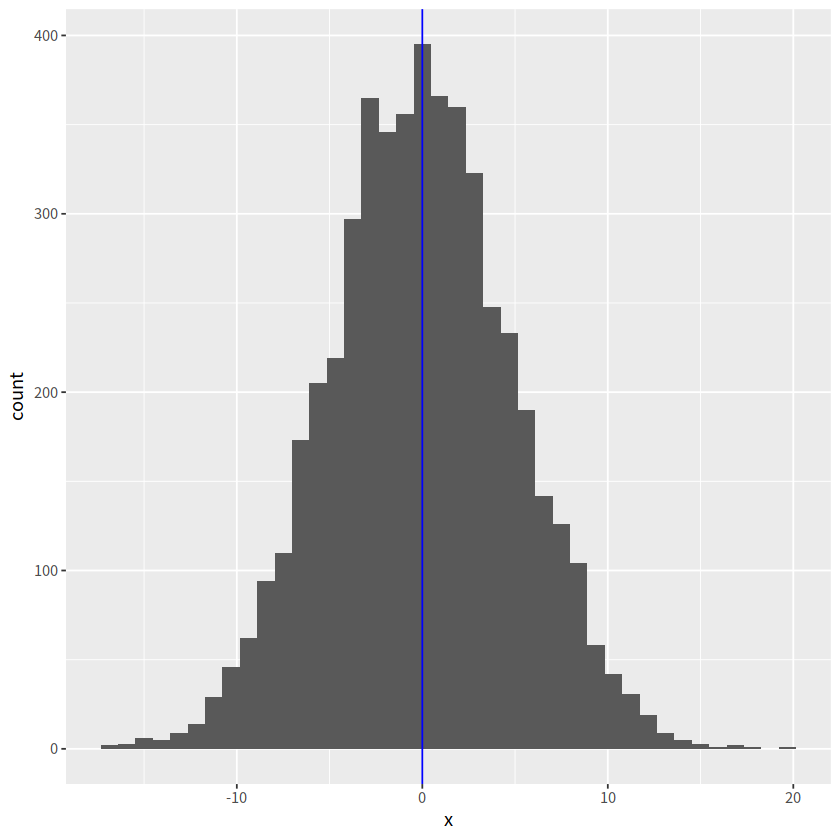

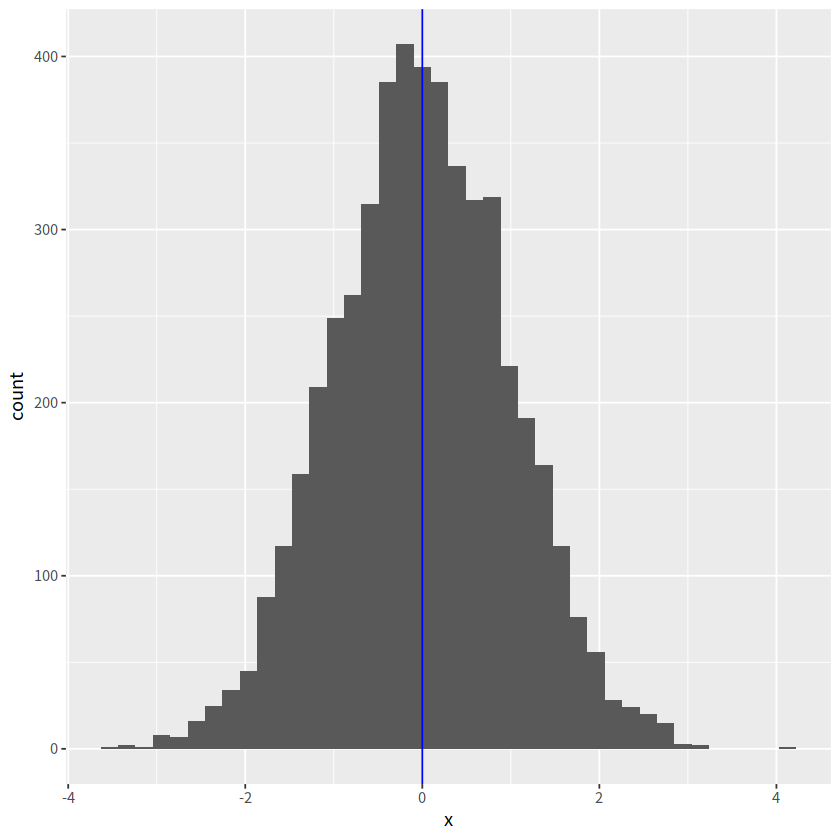

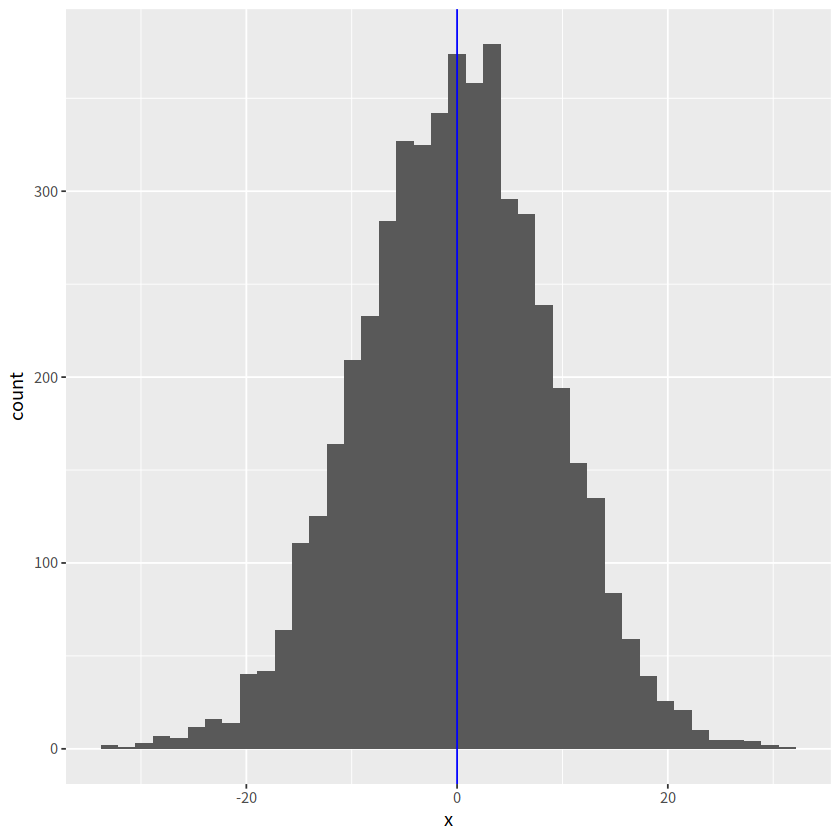

In [281]:
plot_rnorm <- function(sd){
    tibble(x = rnorm(n = 5000, mean = 0, sd = sd)) %>% 
      ggplot(aes(x)) +
      geom_histogram(bins = 40) +
      geom_vline(xintercept = 0, color = "blue")
}

plots <- 
  c(5, 1, 9) %>% 
  map(plot_rnorm)

plots %>% 
  walk(print)

`map()`函数是一定要返回列表的，但`walk()`看上去函数没有返回值，实际上它返回的就是它的输入，只是用户不可见而已。![image.png](image/walk.png)
这样的设计很有用，尤其在管道操作中，我们可以统计中，用`walk()`保存中间计算的结果或者生成图片，然后若无其事地继续管道（因为`walk()`返回值，就是输入`walk`的值），保持计算的连贯。